# Titanic Analysis Project

# Investigate a Dataset (Salaries)
* The primary goal of the project is to go through the dataset and the general data analysis process to Explratory The Behaviour of data to extract meaningful knowledge , insights and Vision about that data which improve and Enhance  our Business  

# Tools we will use it in that project ::

* Numpy :: Which Use To dael with matrix and mut dimentions array and to apply Mathimatical operations.
* Pandas :: which Use To load data , Wrangling and Mainpulationg With data .
* Matplotlib and Seaborn :: Whe Use To Visualize data to identify Trends and Pattern in data.

* Introduction

* Investigate Employee Salaries Data ::

1 _Dataset

        I choose the  Titanic data set for data analysis. This data set contains information about 892 Passenger collected from Kaggle , including Passenger Id, Basepay , Survived , Pclass , Name , Sex , Age , Fare , Ticket  and Embarked .I would like to find other intresting patterns in the dataset
        
2 _ I decide to investigate Titanic data for Cleansing Original Titanic dataset and identifing null , na , duplicates and outlier in that dataset.



3 _  The Most Usefull Questions To analize Data :: 
 
   1.  Which year has the highest Basepay?
   2.  Which year has the highest overtime-pay?
   3.  Which year has the highest Benifit? 
   4.  Which year has the highest Total-pay?
   5.  Which year has the highest Total-Benifit?
   6.  Which Employee have max Basepay.
   7.  Which Employee have max Benifit?
   8.  Which Employee have max Total-pay?
   9.  Which Employee have max Total-Benifit?
   10. Which Employee have min Basepay?
   11. Which Employee have min Benifit?
   12. Which Employee have min Total-pay?
   13. Which Employee have min Total-Benifit? 
   14. Identify the distribution of data?
    

* Import required Liberaries and Frameworks :

In [35]:
import numpy    as np
import pandas   as pd
import seaborn  as sns
import warnings as w
import matplotlib.pyplot as plt


* Set some instruction and rules

In [ ]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc={'figure.figsize': [20, 10]}, font_scale=1.7)

In [ ]:
* Loading Titanic dataset :

In [36]:
df = pd.read_csv("titanic_full.csv")

In [37]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

* From the result above we can see that ::
    * Dataset include 891 record.
    * Dataset include 12 Column.
* Columns Defination ::
**********************************
* pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

In [146]:
# More efficient  data dictionary will help us better understand the data

data ={
'Variable' : ['survival', 'pclass','sex','Age','sibsp','parch','ticket','fare','cabin','embarked'],
    'Definition' : ['Survival','Ticket class','Sex','Age in years','# of siblings / spouses aboard the Titanic',
                    '# of parents / children aboard the Titanic','Ticket number','Passenger fare','Cabin number',
                   'Port of Embarkation']}

Data_Understand = pd.DataFrame(data = data,columns=['Variable','Definition','Key'])
Data_Dictionary.fillna(' ', inplace=True)

Data_Understand.Key[0] = 'No -> 0, Yes -> 1'
Data_Understand.Key[1] = '1 = 1st, 2 = 2nd, 3 = 3rd'
Data_Understand.Key[9] = 'C = Cherbourg, Q = Queenstown, S = Southampton'


In [147]:
Data_Understand

Variable                                  Definition  \
0  survival                                    Survival   
1    pclass                                Ticket class   
2       sex                                         Sex   
3       Age                                Age in years   
4     sibsp  # of siblings / spouses aboard the Titanic   
5     parch  # of parents / children aboard the Titanic   
6    ticket                               Ticket number   
7      fare                              Passenger fare   
8     cabin                                Cabin number   
9  embarked                         Port of Embarkation   

                                              Key  
0                               No -> 0, Yes -> 1  
1                       1 = 1st, 2 = 2nd, 3 = 3rd  
2                                             NaN  
3                                             NaN  
4                                             NaN  
5                                             NaN  
6                                             NaN  
7                                             NaN  
8                                             NaN  
9  C = Cherbourg, Q = Queenstown, S = Southampton

In [151]:
Female_Labels = df[df.Sex == 'female'].Name.map(lambda x : x.split(',')[1].split('.')[0].strip()).value_counts()
Female_Labels

Miss            182
Mrs             125
Mlle              2
the Countess      1
Dr                1
Lady              1
Ms                1
Mme               1
Name: Name, dtype: int64

In [150]:
Male_Labels = df[df.Sex == 'male'].Name.map(lambda x : x.split(',')[1].split('.')[0].strip()).value_counts()
Male_Labels

Mr          517
Master       40
Dr            6
Rev           6
Major         2
Col           2
Sir           1
Jonkheer      1
Capt          1
Don           1
Name: Name, dtype: int64

* EDA :: Exploratory data analysis ::
    * After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused or usless data.

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
# Present Statistical describtion of Numerical data ::
df.describe(include="number")

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [43]:
# Present Statistical describtion of Numerical data ::
df.describe(include="number")

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [44]:
# Present Statistical describtion of Categorical data ::
df.describe(include="object")

Name   Sex Ticket    Cabin Embarked
count                          891   891    891      204      889
unique                         891     2    681      147        3
top     Berriman, Mr. William John  male   1601  B96 B98        S
freq                             1   577      7        4      644

In [45]:
# get the Record which have max  Fare ::
df[df["Fare"] == df["Fare"].max()]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

In [46]:
# get the Record which have min Fare ::
df[df["Fare"] == df["Fare"].min()]

PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robert J  male   
806          807         0       1            Andrews, Mr. Thomas Jr  male   
815          816         0       1                  Fry, Mr. Richard  male   
822          823         0       1   Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
179  36.0      0      0    LINE   0.0   NaN        S  
263  40.0      0      0  112059   0.0   B94        S  
271  25.0      0      0    LINE   0.0   NaN        S  
277   NaN      0      0  239853   0.0   NaN        S  
302  19.0      0      0    LINE   0.0   NaN        S  
413   NaN      0      0  239853   0.0   NaN        S  
466   NaN      0      0  239853   0.0   NaN        S  
481   NaN      0      0  239854   0.0   NaN        S  
597  49.0      0      0    LINE   0.0   NaN        S  
633   NaN      0      0  112052   0.0   NaN        S  
674   NaN      0      0  239856   0.0   NaN        S  
732   NaN      0      0  239855   0.0   NaN        S  
806  39.0      0      0  112050   0.0   A36        S  
815   NaN      0      0  112058   0.0  B102        S  
822  38.0      0      0   19972   0.0   NaN        S

In [47]:
# get the Record which have max Age  ::
df[df["Age"] == df["Age"].max()]

PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S

In [48]:
# get the Record which have min Age ::
df[df["Age"] == df["Age"].min()]

PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C

In [49]:
df.groupby("Survived").describe().transpose()

Survived                    0           1
PassengerId count  549.000000  342.000000
            mean   447.016393  444.368421
            std    260.640469  252.358840
            min      1.000000    2.000000
            25%    211.000000  250.750000
            50%    455.000000  439.500000
            75%    675.000000  651.500000
            max    891.000000  890.000000
Pclass      count  549.000000  342.000000
            mean     2.531876    1.950292
            std      0.735805    0.863321
            min      1.000000    1.000000
            25%      2.000000    1.000000
            50%      3.000000    2.000000
            75%      3.000000    3.000000
            max      3.000000    3.000000
Age         count  424.000000  290.000000
            mean    30.626179   28.343690
            std     14.172110   14.950952
            min      1.000000    0.420000
            25%     21.000000   19.000000
            50%     28.000000   28.000000
            75%     39.000000   36.000000
            max     74.000000   80.000000
SibSp       count  549.000000  342.000000
            mean     0.553734    0.473684
            std      1.288399    0.708688
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      1.000000    1.000000
            max      8.000000    4.000000
Parch       count  549.000000  342.000000
            mean     0.329690    0.464912
            std      0.823166    0.771712
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      0.000000    1.000000
            max      6.000000    5.000000
Fare        count  549.000000  342.000000
            mean    22.117887   48.395408
            std     31.388207   66.596998
            min      0.000000    0.000000
            25%      7.854200   12.475000
            50%     10.500000   26.000000
            75%     26.000000   57.000000
            max    263.000000  512.329200

In [50]:
df.groupby("Pclass").describe().transpose()

Pclass                      1           2           3
PassengerId count  216.000000  184.000000  491.000000
            mean   461.597222  445.956522  439.154786
            std    246.737616  250.852161  264.441453
            min      2.000000   10.000000    1.000000
            25%    270.750000  234.500000  200.000000
            50%    472.000000  435.500000  432.000000
            75%    670.500000  668.000000  666.500000
            max    890.000000  887.000000  891.000000
Survived    count  216.000000  184.000000  491.000000
            mean     0.629630    0.472826    0.242363
            std      0.484026    0.500623    0.428949
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      1.000000    0.000000    0.000000
            75%      1.000000    1.000000    0.000000
            max      1.000000    1.000000    1.000000
Age         count  186.000000  173.000000  355.000000
            mean    38.233441   29.877630   25.140620
            std     14.802856   14.001077   12.495398
            min      0.920000    0.670000    0.420000
            25%     27.000000   23.000000   18.000000
            50%     37.000000   29.000000   24.000000
            75%     49.000000   36.000000   32.000000
            max     80.000000   70.000000   74.000000
SibSp       count  216.000000  184.000000  491.000000
            mean     0.416667    0.402174    0.615071
            std      0.611898    0.601633    1.374883
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    1.000000    1.000000
            max      3.000000    3.000000    8.000000
Parch       count  216.000000  184.000000  491.000000
            mean     0.356481    0.380435    0.393075
            std      0.693997    0.690963    0.888861
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      0.000000    1.000000    0.000000
            max      4.000000    3.000000    6.000000
Fare        count  216.000000  184.000000  491.000000
            mean    84.154687   20.662183   13.675550
            std     78.380373   13.417399   11.778142
            min      0.000000    0.000000    0.000000
            25%     30.923950   13.000000    7.750000
            50%     60.287500   14.250000    8.050000
            75%     93.500000   26.000000   15.500000
            max    512.329200   73.500000   69.550000

In [51]:
df.groupby("Sex").describe().transpose()

Sex                    female        male
PassengerId count  314.000000  577.000000
            mean   431.028662  454.147314
            std    256.846324  257.486139
            min      2.000000    1.000000
            25%    231.750000  222.000000
            50%    414.500000  464.000000
            75%    641.250000  680.000000
            max    889.000000  891.000000
Survived    count  314.000000  577.000000
            mean     0.742038    0.188908
            std      0.438211    0.391775
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      1.000000    0.000000
            75%      1.000000    0.000000
            max      1.000000    1.000000
Pclass      count  314.000000  577.000000
            mean     2.159236    2.389948
            std      0.857290    0.813580
            min      1.000000    1.000000
            25%      1.000000    2.000000
            50%      2.000000    3.000000
            75%      3.000000    3.000000
            max      3.000000    3.000000
Age         count  261.000000  453.000000
            mean    27.915709   30.726645
            std     14.110146   14.678201
            min      0.750000    0.420000
            25%     18.000000   21.000000
            50%     27.000000   29.000000
            75%     37.000000   39.000000
            max     63.000000   80.000000
SibSp       count  314.000000  577.000000
            mean     0.694268    0.429809
            std      1.156520    1.061811
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      1.000000    0.000000
            max      8.000000    8.000000
Parch       count  314.000000  577.000000
            mean     0.649682    0.235702
            std      1.022846    0.612294
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      1.000000    0.000000
            max      6.000000    5.000000
Fare        count  314.000000  577.000000
            mean    44.479818   25.523893
            std     57.997698   43.138263
            min      6.750000    0.000000
            25%     12.071875    7.895800
            50%     23.000000   10.500000
            75%     55.000000   26.550000
            max    512.329200  512.329200

In [52]:
df.groupby("Age").describe().transpose()

Age                   0.42   0.67        0.75        0.83    0.92   \
PassengerId count    1.0000    1.0    2.000000    2.000000    1.00   
            mean   804.0000  756.0  557.500000  455.500000  306.00   
            std         NaN    NaN  123.743687  532.451406     NaN   
            min    804.0000  756.0  470.000000   79.000000  306.00   
            25%    804.0000  756.0  513.750000  267.250000  306.00   
            50%    804.0000  756.0  557.500000  455.500000  306.00   
            75%    804.0000  756.0  601.250000  643.750000  306.00   
            max    804.0000  756.0  645.000000  832.000000  306.00   
Survived    count    1.0000    1.0    2.000000    2.000000    1.00   
            mean     1.0000    1.0    1.000000    1.000000    1.00   
            std         NaN    NaN    0.000000    0.000000     NaN   
            min      1.0000    1.0    1.000000    1.000000    1.00   
            25%      1.0000    1.0    1.000000    1.000000    1.00   
            50%      1.0000    1.0    1.000000    1.000000    1.00   
            75%      1.0000    1.0    1.000000    1.000000    1.00   
            max      1.0000    1.0    1.000000    1.000000    1.00   
Pclass      count    1.0000    1.0    2.000000    2.000000    1.00   
            mean     3.0000    2.0    3.000000    2.000000    1.00   
            std         NaN    NaN    0.000000    0.000000     NaN   
            min      3.0000    2.0    3.000000    2.000000    1.00   
            25%      3.0000    2.0    3.000000    2.000000    1.00   
            50%      3.0000    2.0    3.000000    2.000000    1.00   
            75%      3.0000    2.0    3.000000    2.000000    1.00   
            max      3.0000    2.0    3.000000    2.000000    1.00   
SibSp       count    1.0000    1.0    2.000000    2.000000    1.00   
            mean     0.0000    1.0    2.000000    0.500000    1.00   
            std         NaN    NaN    0.000000    0.707107     NaN   
            min      0.0000    1.0    2.000000    0.000000    1.00   
            25%      0.0000    1.0    2.000000    0.250000    1.00   
            50%      0.0000    1.0    2.000000    0.500000    1.00   
            75%      0.0000    1.0    2.000000    0.750000    1.00   
            max      0.0000    1.0    2.000000    1.000000    1.00   
Parch       count    1.0000    1.0    2.000000    2.000000    1.00   
            mean     1.0000    1.0    1.000000    1.500000    2.00   
            std         NaN    NaN    0.000000    0.707107     NaN   
            min      1.0000    1.0    1.000000    1.000000    2.00   
            25%      1.0000    1.0    1.000000    1.250000    2.00   
            50%      1.0000    1.0    1.000000    1.500000    2.00   
            75%      1.0000    1.0    1.000000    1.750000    2.00   
            max      1.0000    1.0    1.000000    2.000000    2.00   
Fare        count    1.0000    1.0    2.000000    2.000000    1.00   
            mean     8.5167   14.5   19.258300   23.875000  151.55   
            std         NaN    NaN    0.000000    7.247845     NaN   
            min      8.5167   14.5   19.258300   18.750000  151.55   
            25%      8.5167   14.5   19.258300   21.312500  151.55   
            50%      8.5167   14.5   19.258300   23.875000  151.55   
            75%      8.5167   14.5   19.258300   26.437500  151.55   
            max      8.5167   14.5   19.258300   29.000000  151.55   

Age                     1.00        2.00        3.00        4.00        5.00   \
PassengerId count    7.000000   10.000000    6.000000   10.000000    4.000000   
            mean   415.428571  346.900000  272.000000  466.100000  380.000000   
            std    284.822083  271.889050  136.529850  333.596046  309.581438   
            min    165.000000    8.000000   44.000000   11.000000   59.000000   
            25%    178.500000  141.500000  211.000000  175.250000  190.250000   
            50%    382.000000  319.500000  305.500000  532.500000  341.500000   
  

In [53]:
df.groupby("Cabin").describe().transpose()

Cabin                  A10    A14    A16    A19       A20    A23       A24  \
PassengerId count    1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            mean   584.000  476.0  557.0  285.0  600.0000  631.0  868.0000   
            std        NaN    NaN    NaN    NaN       NaN    NaN       NaN   
            min    584.000  476.0  557.0  285.0  600.0000  631.0  868.0000   
            25%    584.000  476.0  557.0  285.0  600.0000  631.0  868.0000   
            50%    584.000  476.0  557.0  285.0  600.0000  631.0  868.0000   
            75%    584.000  476.0  557.0  285.0  600.0000  631.0  868.0000   
            max    584.000  476.0  557.0  285.0  600.0000  631.0  868.0000   
Survived    count    1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            mean     0.000    0.0    1.0    0.0    1.0000    1.0    0.0000   
            std        NaN    NaN    NaN    NaN       NaN    NaN       NaN   
            min      0.000    0.0    1.0    0.0    1.0000    1.0    0.0000   
            25%      0.000    0.0    1.0    0.0    1.0000    1.0    0.0000   
            50%      0.000    0.0    1.0    0.0    1.0000    1.0    0.0000   
            75%      0.000    0.0    1.0    0.0    1.0000    1.0    0.0000   
            max      0.000    0.0    1.0    0.0    1.0000    1.0    0.0000   
Pclass      count    1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            mean     1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            std        NaN    NaN    NaN    NaN       NaN    NaN       NaN   
            min      1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            25%      1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            50%      1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            75%      1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            max      1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
Age         count    1.000    0.0    1.0    0.0    1.0000    1.0    1.0000   
            mean    36.000    NaN   48.0    NaN   49.0000   80.0   31.0000   
            std        NaN    NaN    NaN    NaN       NaN    NaN       NaN   
            min     36.000    NaN   48.0    NaN   49.0000   80.0   31.0000   
            25%     36.000    NaN   48.0    NaN   49.0000   80.0   31.0000   
            50%     36.000    NaN   48.0    NaN   49.0000   80.0   31.0000   
            75%     36.000    NaN   48.0    NaN   49.0000   80.0   31.0000   
            max     36.000    NaN   48.0    NaN   49.0000   80.0   31.0000   
SibSp       count    1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            mean     0.000    0.0    1.0    0.0    1.0000    0.0    0.0000   
            std        NaN    NaN    NaN    NaN       NaN    NaN       NaN   
            min      0.000    0.0    1.0    0.0    1.0000    0.0    0.0000   
            25%      0.000    0.0    1.0    0.0    1.0000    0.0    0.0000   
            50%      0.000    0.0    1.0    0.0    1.0000    0.0    0.0000   
            75%      0.000    0.0    1.0    0.0    1.0000    0.0    0.0000   
            max      0.000    0.0    1.0    0.0    1.0000    0.0    0.0000   
Parch       count    1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            mean     0.000    0.0    0.0    0.0    0.0000    0.0    0.0000   
            std        NaN    NaN    NaN    NaN       NaN    NaN       NaN   
            min      0.000    0.0    0.0    0.0    0.0000    0.0    0.0000   
            25%      0.000    0.0    0.0    0.0    0.0000    0.0    0.0000   
            50%      0.000    0.0    0.0    0.0    0.0000    0.0    0.0000   
            75%      0.000    0.0    0.0    0.0    0.0000    0.0    0.0000   
            max      0.000    0.0    0.0    0.0    0.0000    0.0    0.0000   
Fare        count    1.000    1.0    1.0    1.0    1.0000    1.0    1.0000   
            mean    40.125   52.0   39.6   26.0   56.9292   30.0   50.4958   
            std       

In [54]:
df.groupby("Embarked").describe().transpose()

Embarked                    C           Q           S
PassengerId count  168.000000   77.000000  644.000000
            mean   445.357143  417.896104  449.527950
            std    259.454201  253.646282  256.942044
            min      2.000000    6.000000    1.000000
            25%    235.500000  209.000000  225.750000
            50%    455.000000  389.000000  447.500000
            75%    651.000000  630.000000  673.250000
            max    890.000000  891.000000  889.000000
Survived    count  168.000000   77.000000  644.000000
            mean     0.553571    0.389610    0.336957
            std      0.498608    0.490860    0.473037
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      1.000000    0.000000    0.000000
            75%      1.000000    1.000000    1.000000
            max      1.000000    1.000000    1.000000
Pclass      count  168.000000   77.000000  644.000000
            mean     1.886905    2.909091    2.350932
            std      0.944100    0.369274    0.789402
            min      1.000000    1.000000    1.000000
            25%      1.000000    3.000000    2.000000
            50%      1.000000    3.000000    3.000000
            75%      3.000000    3.000000    3.000000
            max      3.000000    3.000000    3.000000
Age         count  130.000000   28.000000  554.000000
            mean    30.814769   28.089286   29.445397
            std     15.434860   16.915396   14.143192
            min      0.420000    2.000000    0.670000
            25%     21.250000   17.500000   21.000000
            50%     29.000000   27.000000   28.000000
            75%     40.000000   34.500000   38.000000
            max     71.000000   70.500000   80.000000
SibSp       count  168.000000   77.000000  644.000000
            mean     0.386905    0.428571    0.571429
            std      0.557213    0.979105    1.216600
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    0.000000    1.000000
            max      2.000000    4.000000    8.000000
Parch       count  168.000000   77.000000  644.000000
            mean     0.363095    0.168831    0.413043
            std      0.660481    0.656999    0.853253
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    0.000000    0.000000
            max      3.000000    5.000000    6.000000
Fare        count  168.000000   77.000000  644.000000
            mean    59.954144   13.276030   27.079812
            std     83.912994   14.188047   35.887993
            min      4.012500    6.750000    0.000000
            25%     13.697950    7.750000    8.050000
            50%     29.700000    7.750000   13.000000
            75%     78.500025   15.500000   27.900000
            max    512.329200   90.000000  263.000000

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
# present pivot table based on 
p_Table1 = pd.pivot_table(df , columns = "Survived" , index = "Pclass" , values = "Fare")
p_Table1

Survived          0          1
Pclass                        
1         64.684008  95.608029
2         19.412328  22.055700
3         13.669364  13.694887

In [57]:
# present pivot table based on 
p_Table2 = pd.pivot_table(df , columns = "Survived" , index = "Sex" , values = "Fare")
p_Table2

Survived          0          1
Sex                           
female    23.024385  51.938573
male      21.960993  40.821484

In [58]:
# present pivot table based on 
p_Table3 = pd.pivot_table(df , columns = "Survived" , index = "Age" , values = "Fare")
p_Table3

Survived        0         1
Age                        
0.42          NaN    8.5167
0.67          NaN   14.5000
0.75          NaN   19.2583
0.83          NaN   23.8750
0.92          NaN  151.5500
...           ...       ...
70.00     40.7500       NaN
70.50      7.7500       NaN
71.00     42.0792       NaN
74.00      7.7750       NaN
80.00         NaN   30.0000

[88 rows x 2 columns]

In [59]:
# present pivot table based on 
p_Table4 = pd.pivot_table(df , columns = "Survived" , index = "SibSp" , values = "Fare")
p_Table4

Survived          0           1
SibSp                          
0         16.612078   42.900695
1         33.568773   53.309191
2         34.080000   72.146469
3         44.974317  140.712500
4         33.513333   23.566667
5         46.900000         NaN
8         69.550000         NaN

In [60]:
# present pivot table based on 
p_Table5 = pd.pivot_table(df , columns = "Survived" , index = "Parch" , values = "Fare")
p_Table5

Survived          0          1
Parch                         
0         16.548124  42.849430
1         37.111642  54.660126
2         55.625000  73.050208
3         34.375000  20.336100
4         84.968750        NaN
5         32.840625  31.387500
6         46.900000        NaN

In [61]:
# present pivot table based on 
p_Table6 = pd.pivot_table(df , columns = "Survived" , index = "Cabin" , values = "Fare")
p_Table6

Survived        0          1
Cabin                       
A10       40.1250        NaN
A14       52.0000        NaN
A16           NaN  39.600000
A19       26.0000        NaN
A20           NaN  56.929200
...           ...        ...
F33           NaN  11.333333
F38        7.7500        NaN
F4            NaN  39.000000
G6        10.4625  16.700000
T         35.5000        NaN

[147 rows x 2 columns]

In [62]:
# present pivot table based on 
p_Table6 = pd.pivot_table(df , columns = "Survived" , index = "Embarked" , values = "Fare")
p_Table6

Survived          0          1
Embarked                      
C         35.443335  79.720926
Q         13.335904  13.182227
S         20.743987  39.547081

In [63]:
# present pivot table based on 
p_Table7 = pd.pivot_table(df , columns = "Pclass" , index = "Embarked" , values = "Fare")
p_Table7

Pclass             1          2          3
Embarked                                  
C         104.718529  25.358335  11.214083
Q          90.000000  12.350000  11.183393
S          70.364862  20.327439  14.644083

In [64]:
# present pivot table based on 
p_Table8 = pd.pivot_table(df , columns = "Embarked" , index = "Sex" , values = "Fare")
p_Table8

Embarked          C          Q          S
Sex                                      
female    75.169805  12.634958  38.740929
male      48.262109  13.838922  21.711996

In [67]:
Survives = df["Survived"].value_counts()
Survives

0    549
1    342
Name: Survived, dtype: int64

In [69]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:1.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

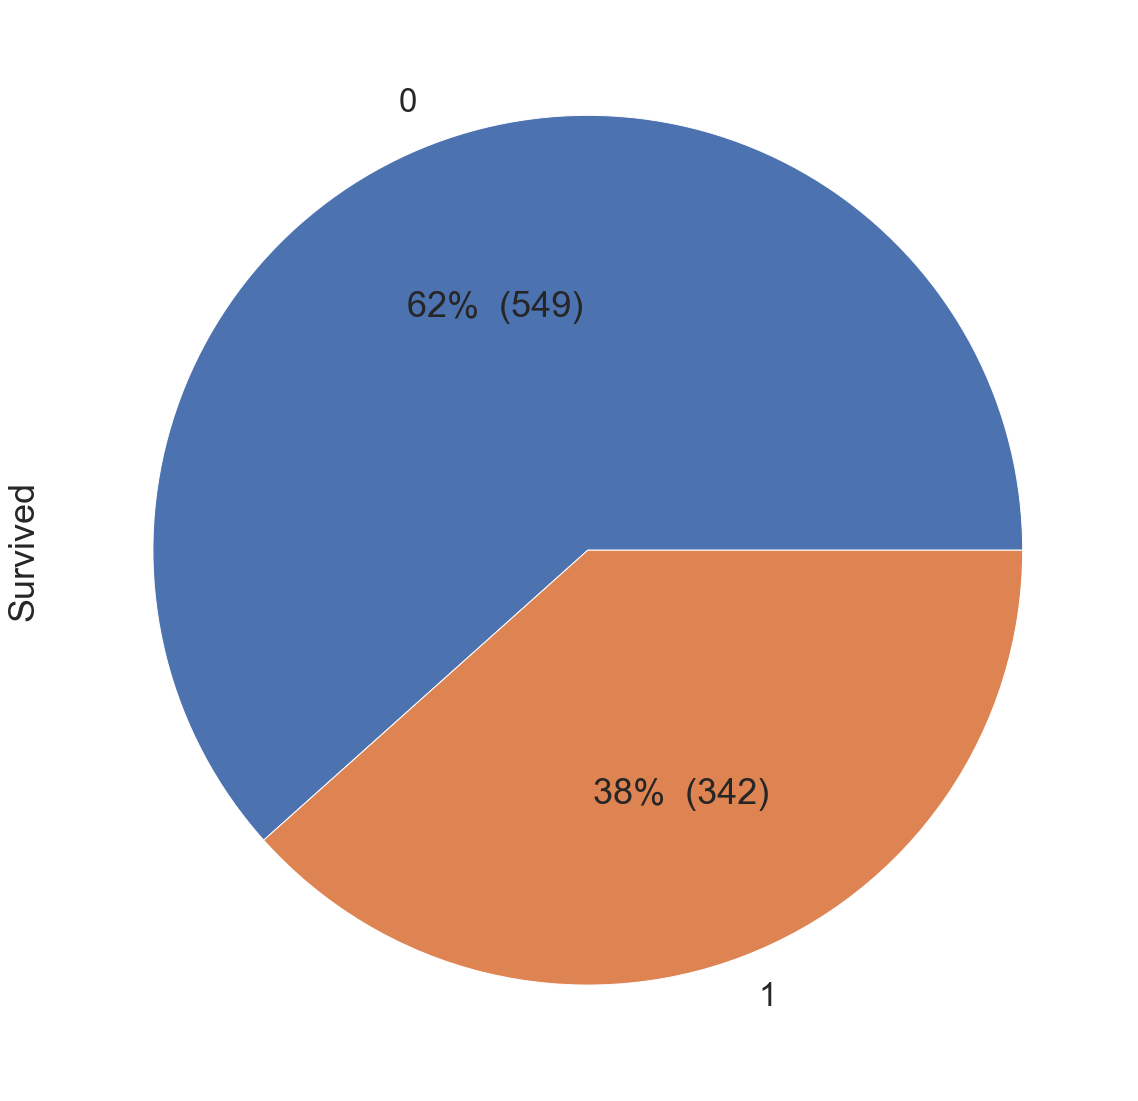

In [71]:
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=3)
Survives.plot.pie(autopct=make_autopct(Survives.values) )

In [159]:
Female_Labels.plot.pie(autopct=make_autopct(Female_Labels.values) , radius = 10  , fontsize = 80 , explode = [0 , 0 , 0.1 , 0.2 , 0.2 , 0.4 , 0.5 , 0.6])

In [160]:
Male_Labels.plot.pie(autopct=make_autopct(Male_Labels.values) , radius = 10  , fontsize = 80)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
Pclasss = df["Pclass"].value_counts()
Pclasss

3    491
1    216
2    184
Name: Pclass, dtype: int64

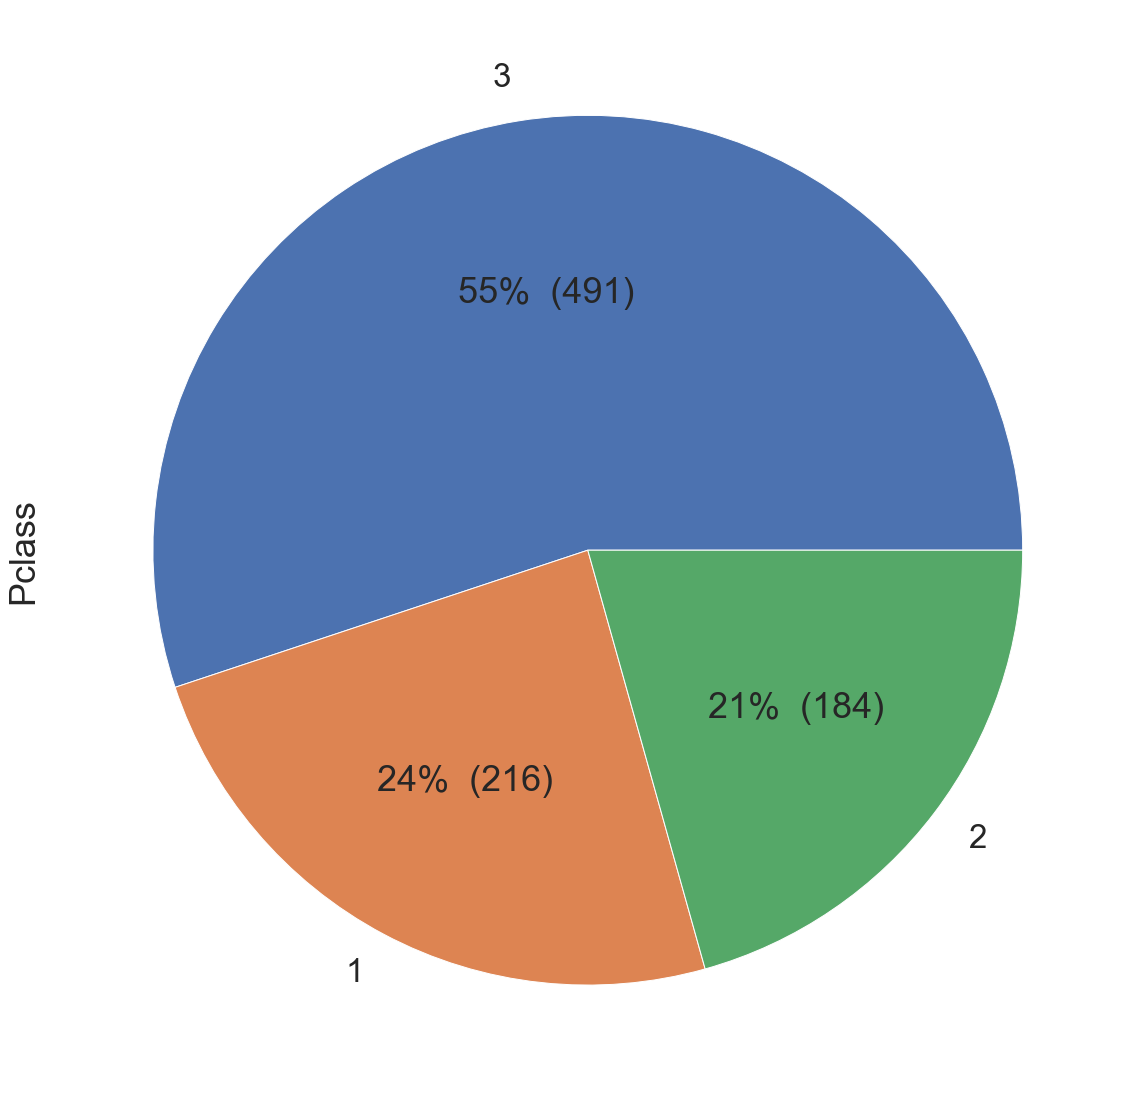

In [74]:
Pclasss.plot.pie(autopct=make_autopct(Survives.values) )

In [75]:
Sexs = df["Sex"].value_counts()
Sexs

male      577
female    314
Name: Sex, dtype: int64

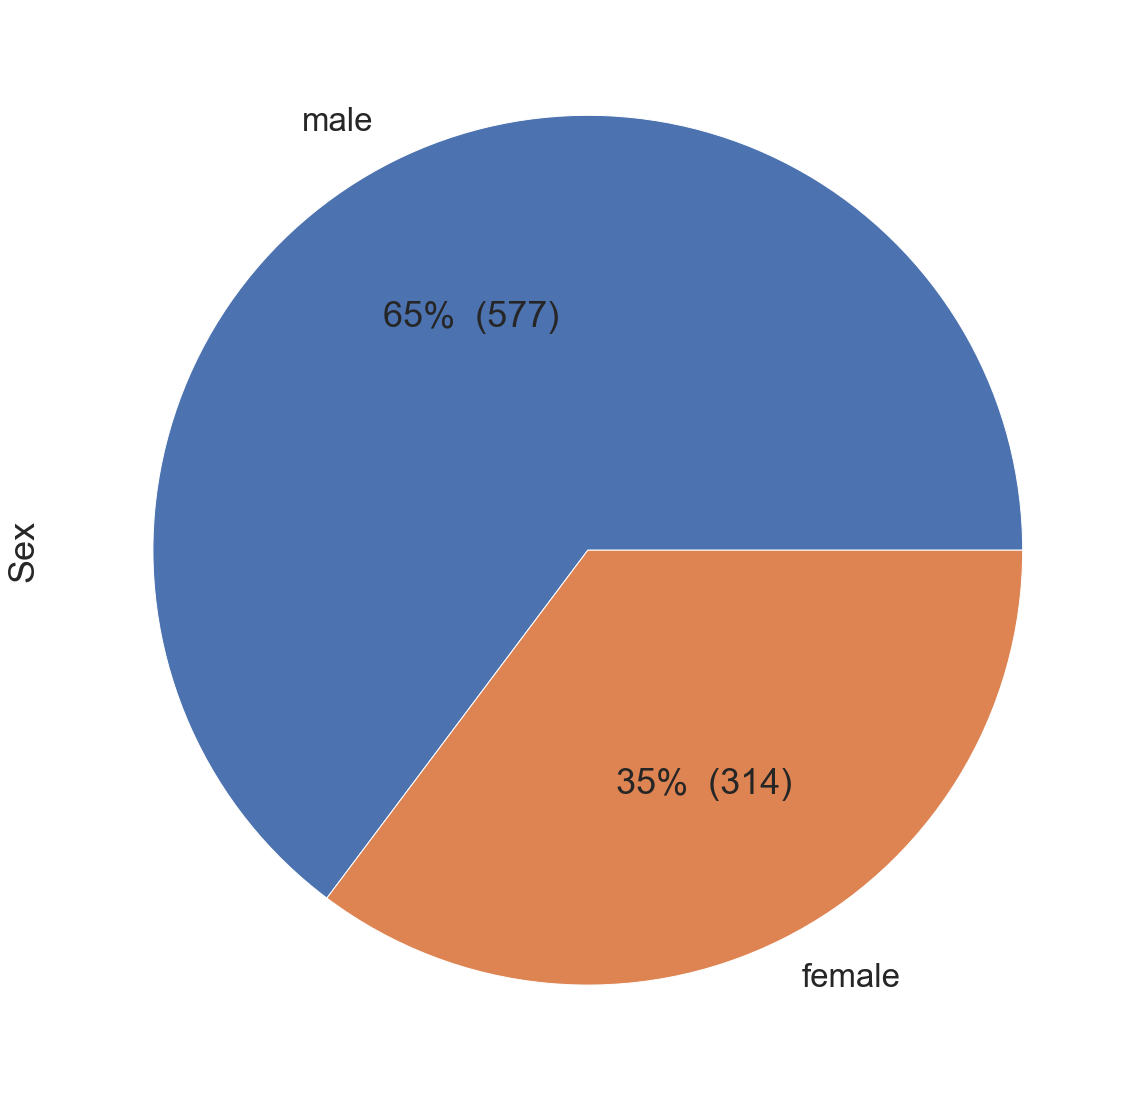

In [76]:
Sexs.plot.pie(autopct=make_autopct(Sexs.values) )

In [82]:
Ages = df["Age"].value_counts()[:25]
Ages

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
28.0    25
21.0    24
25.0    23
Name: Age, dtype: int64

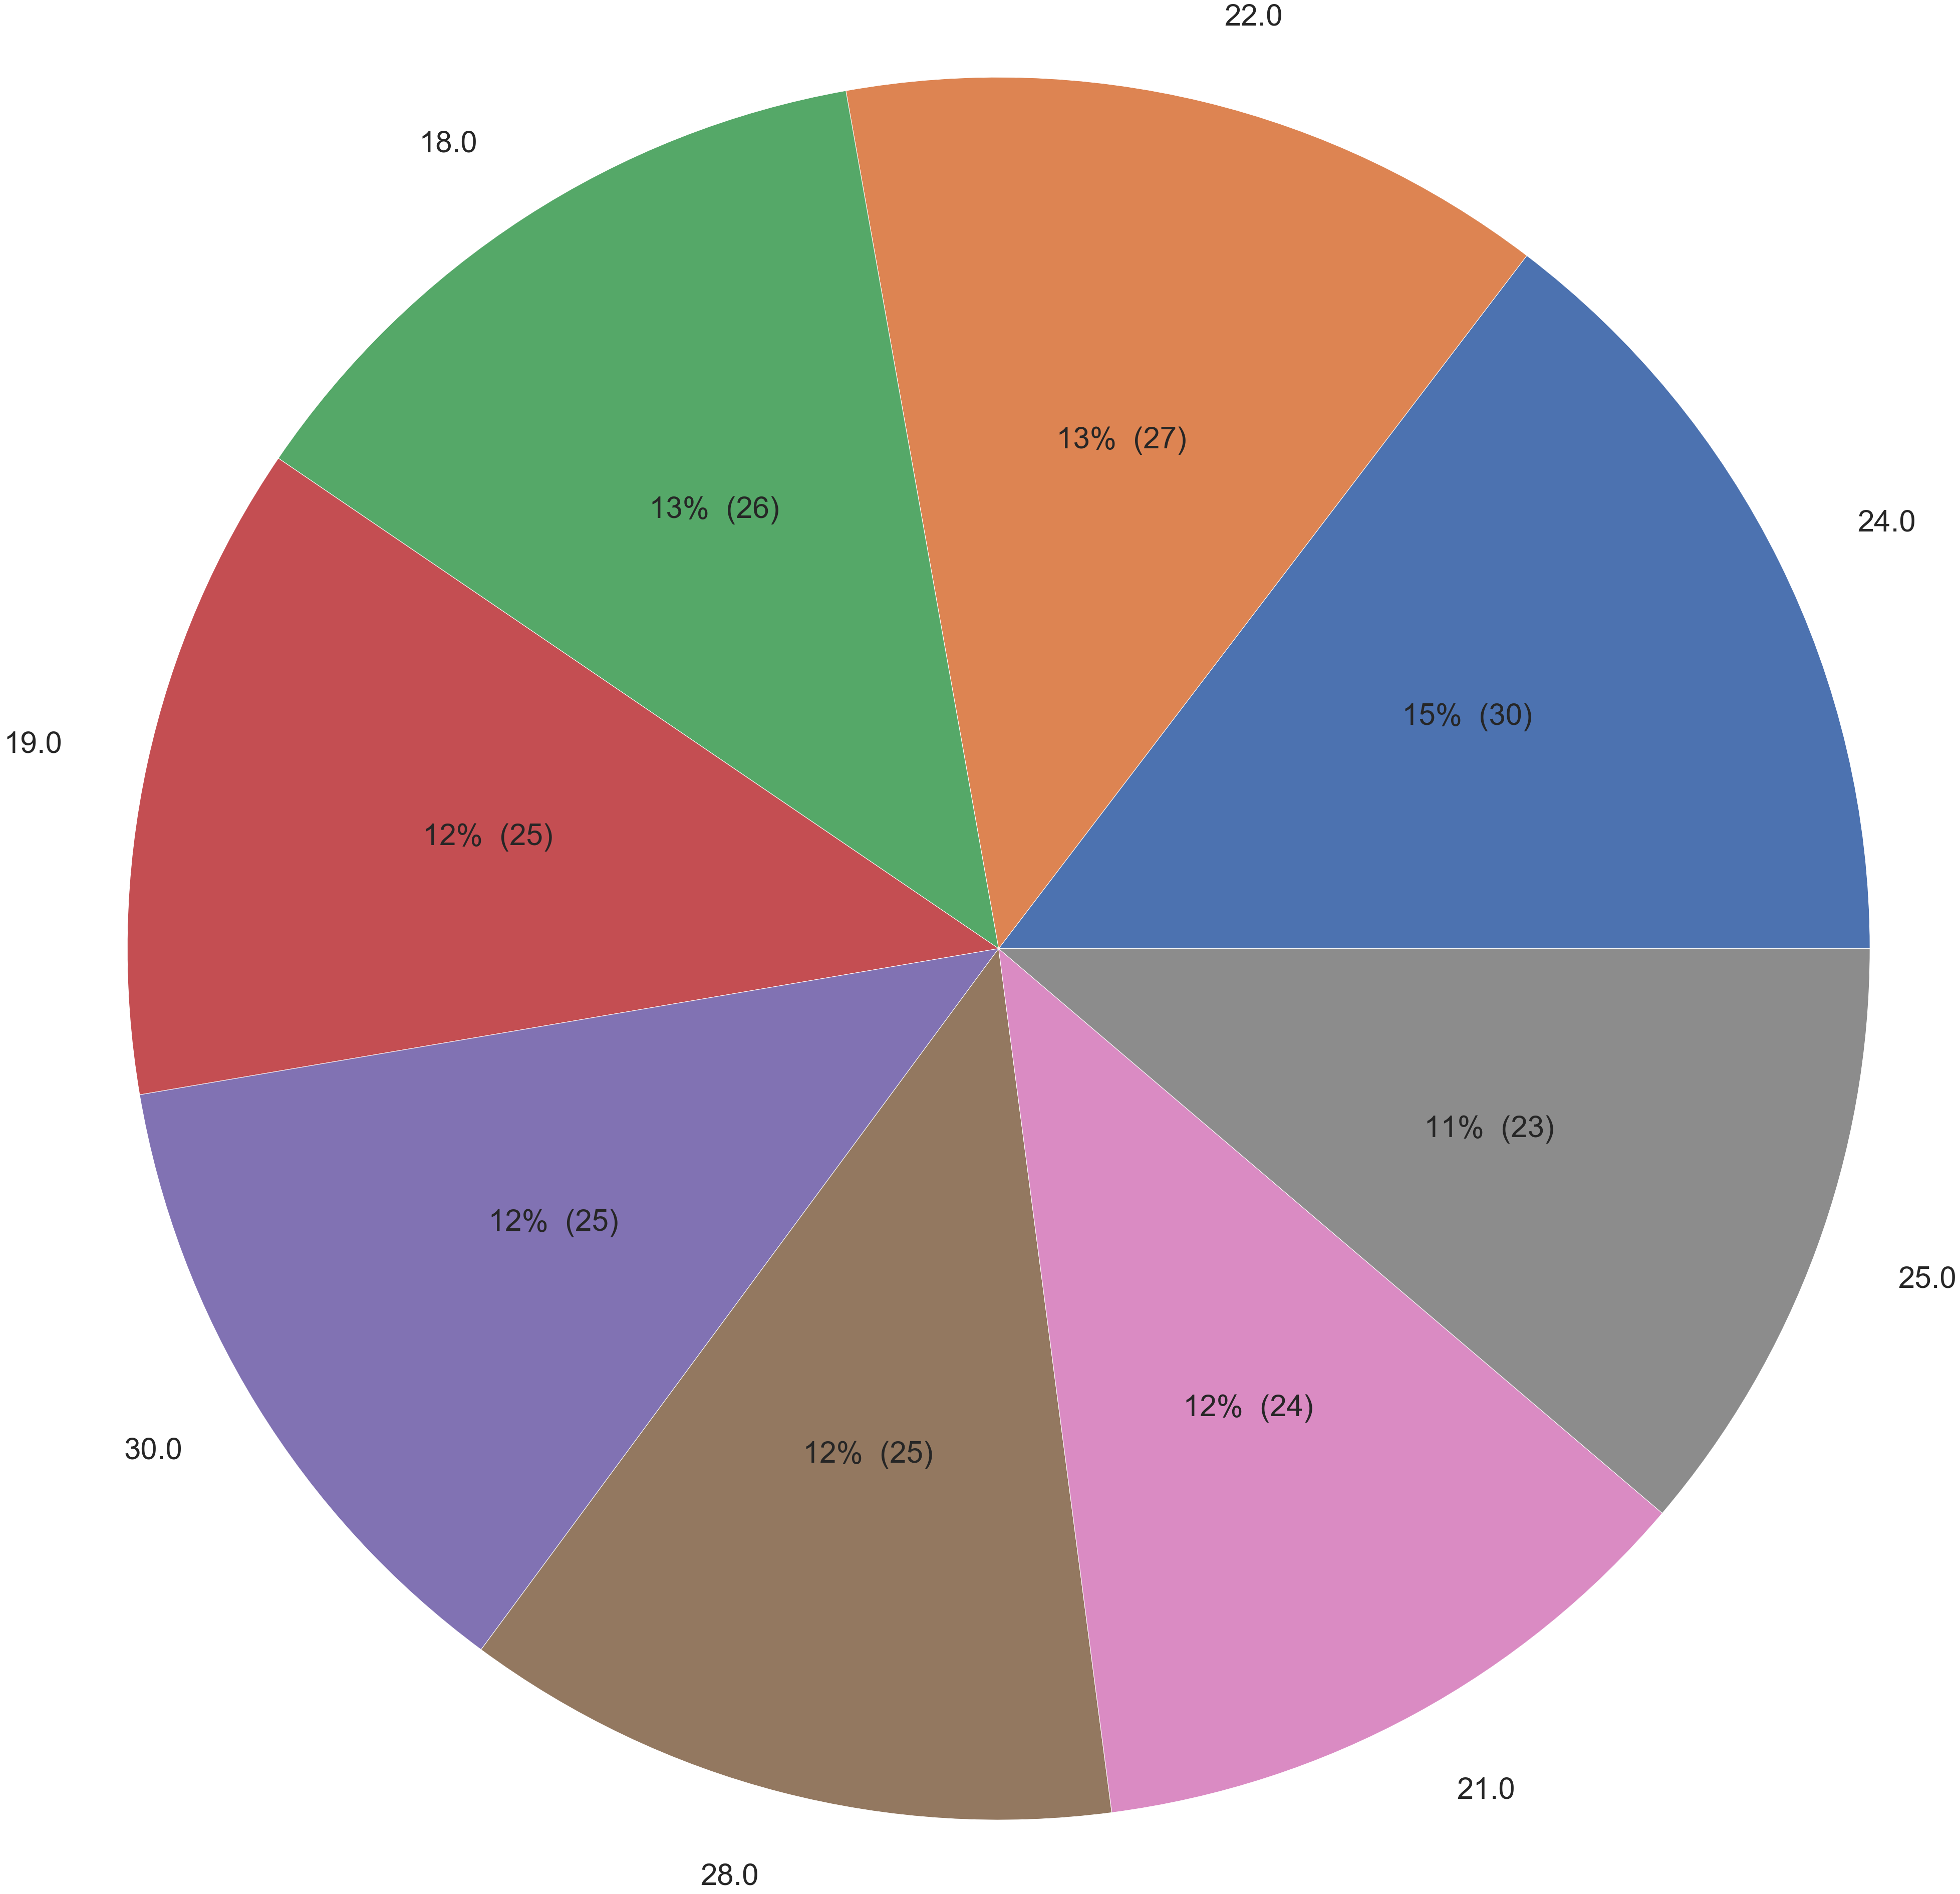

In [84]:
Ages.plot.pie(autopct=make_autopct(Ages.values) ,  radius = 4 , fontsize = 60 )

In [85]:
SibSps = df["SibSp"].value_counts()
SibSps

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

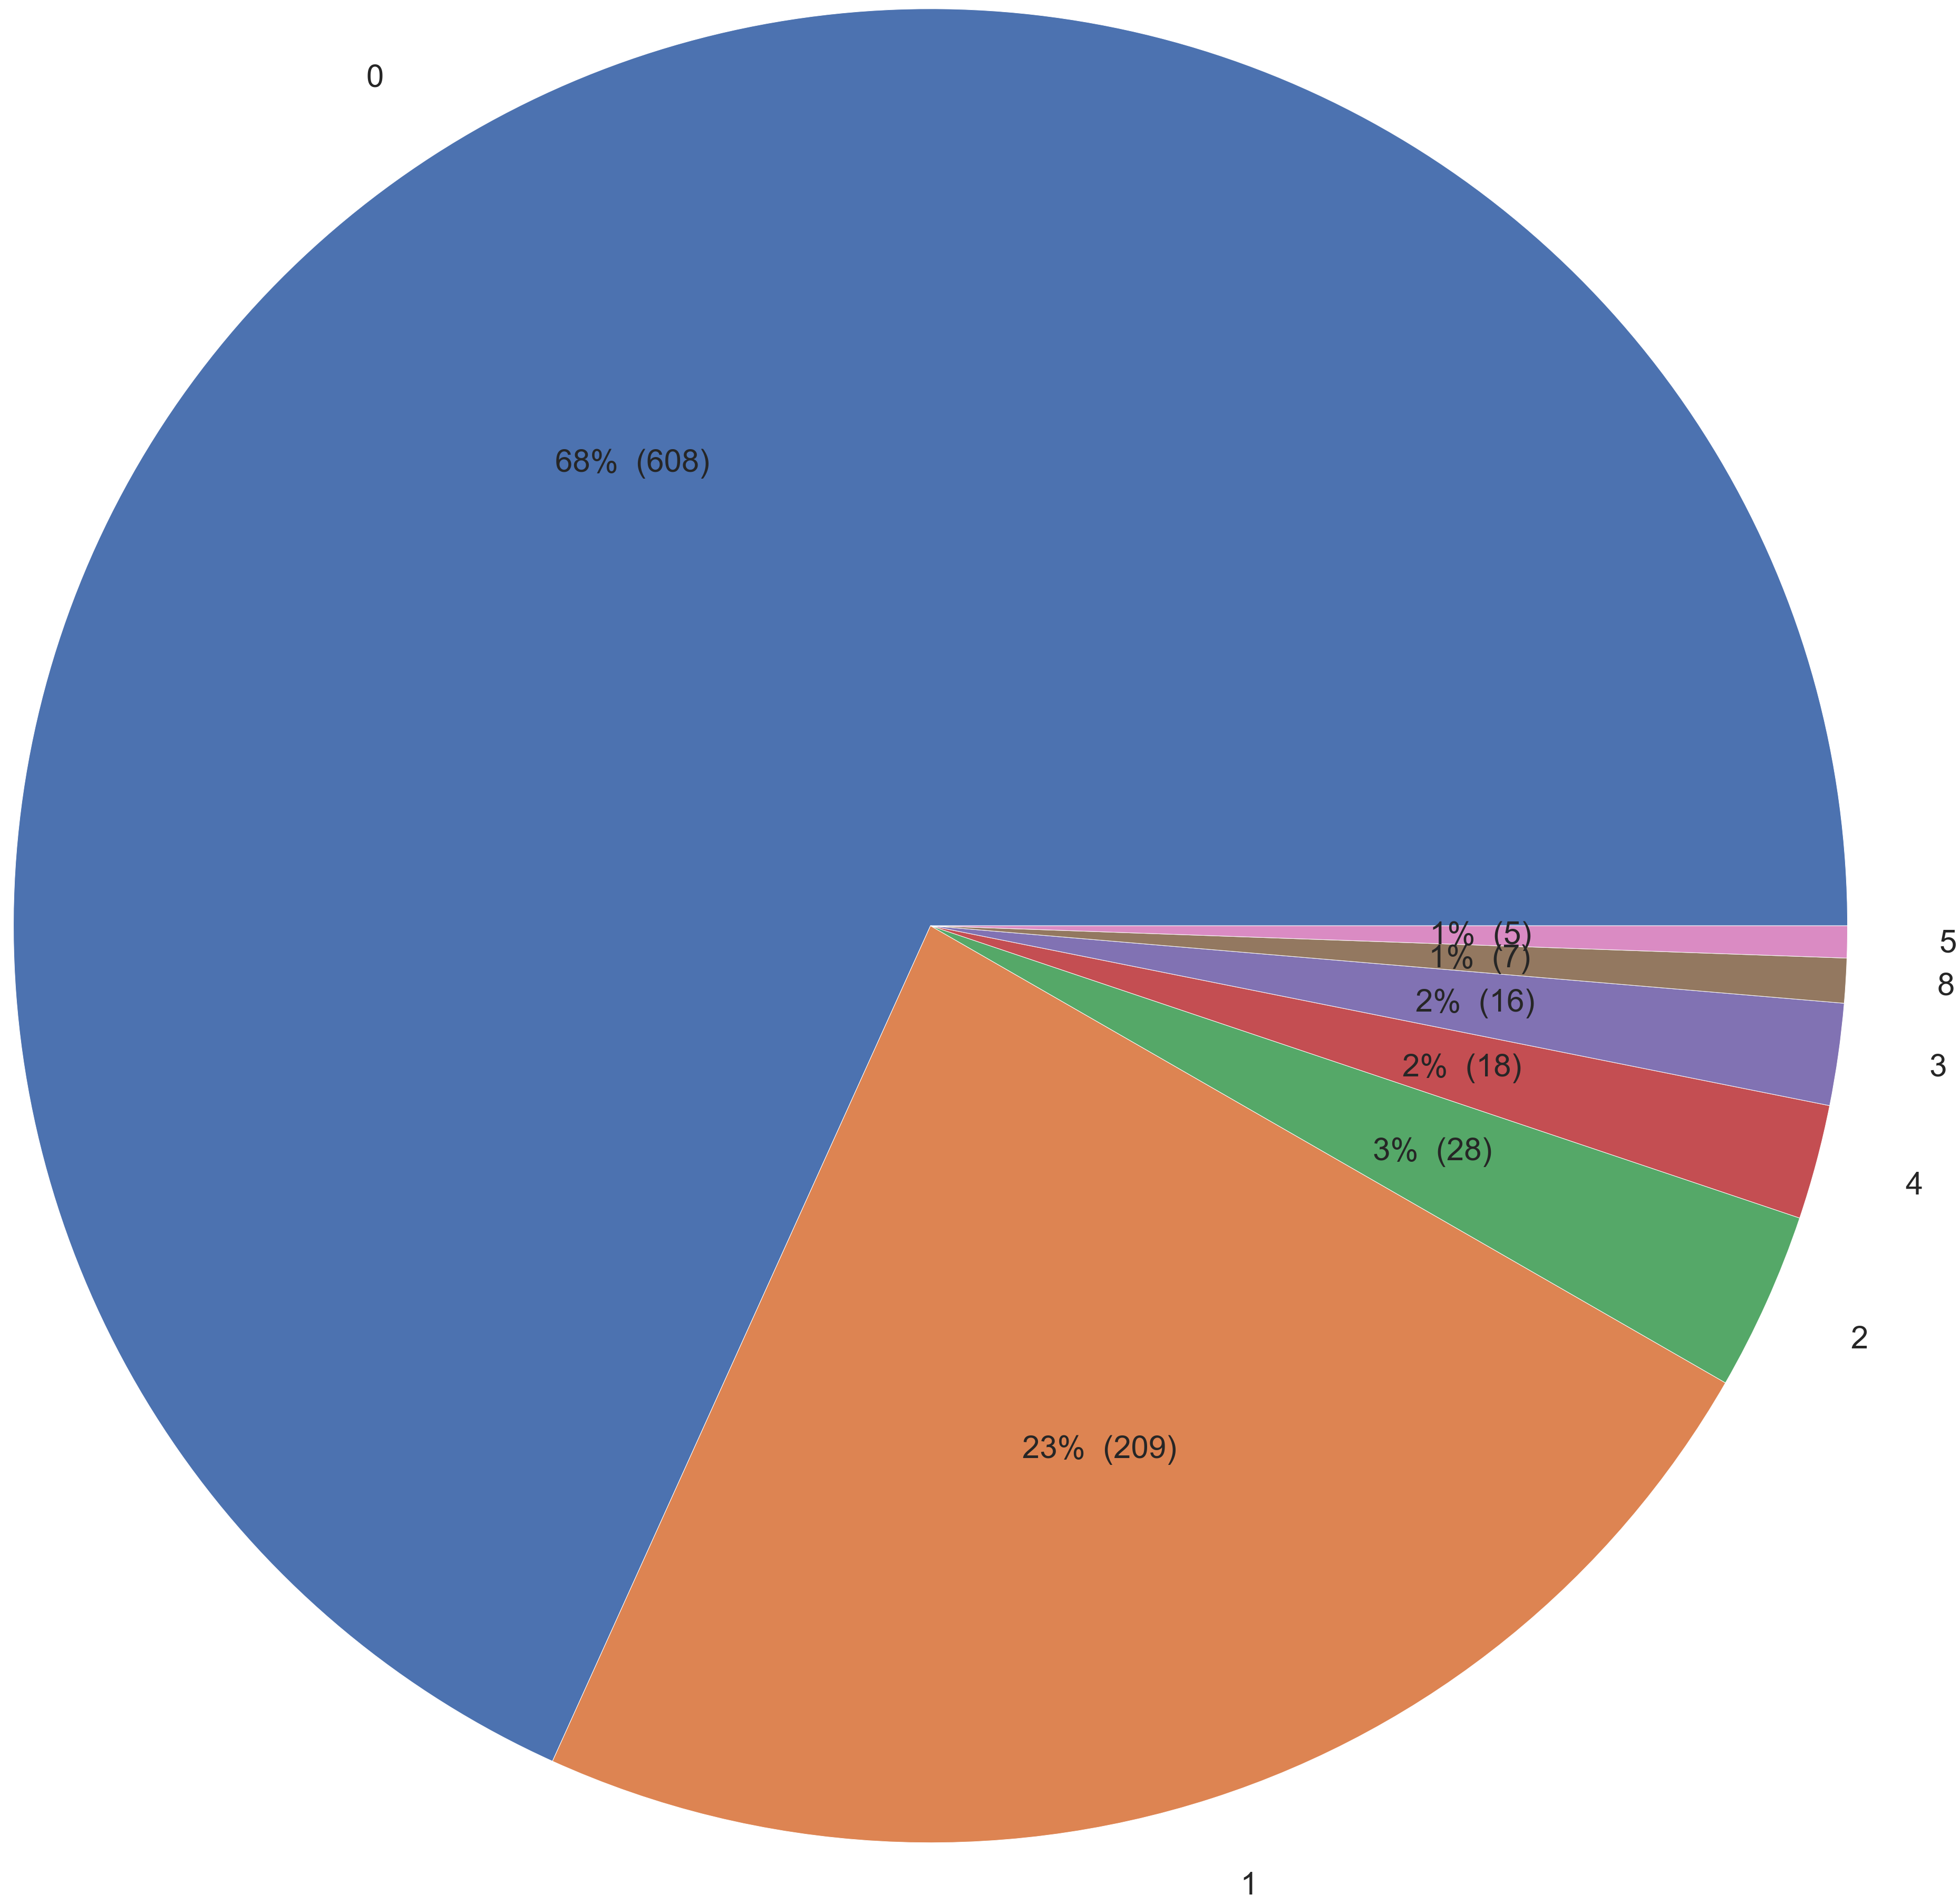

In [88]:
SibSps.plot.pie(autopct=make_autopct(SibSps.values) , radius = 4 , fontsize = 60 )

In [89]:
Parchs = df["Parch"].value_counts()
Parchs

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

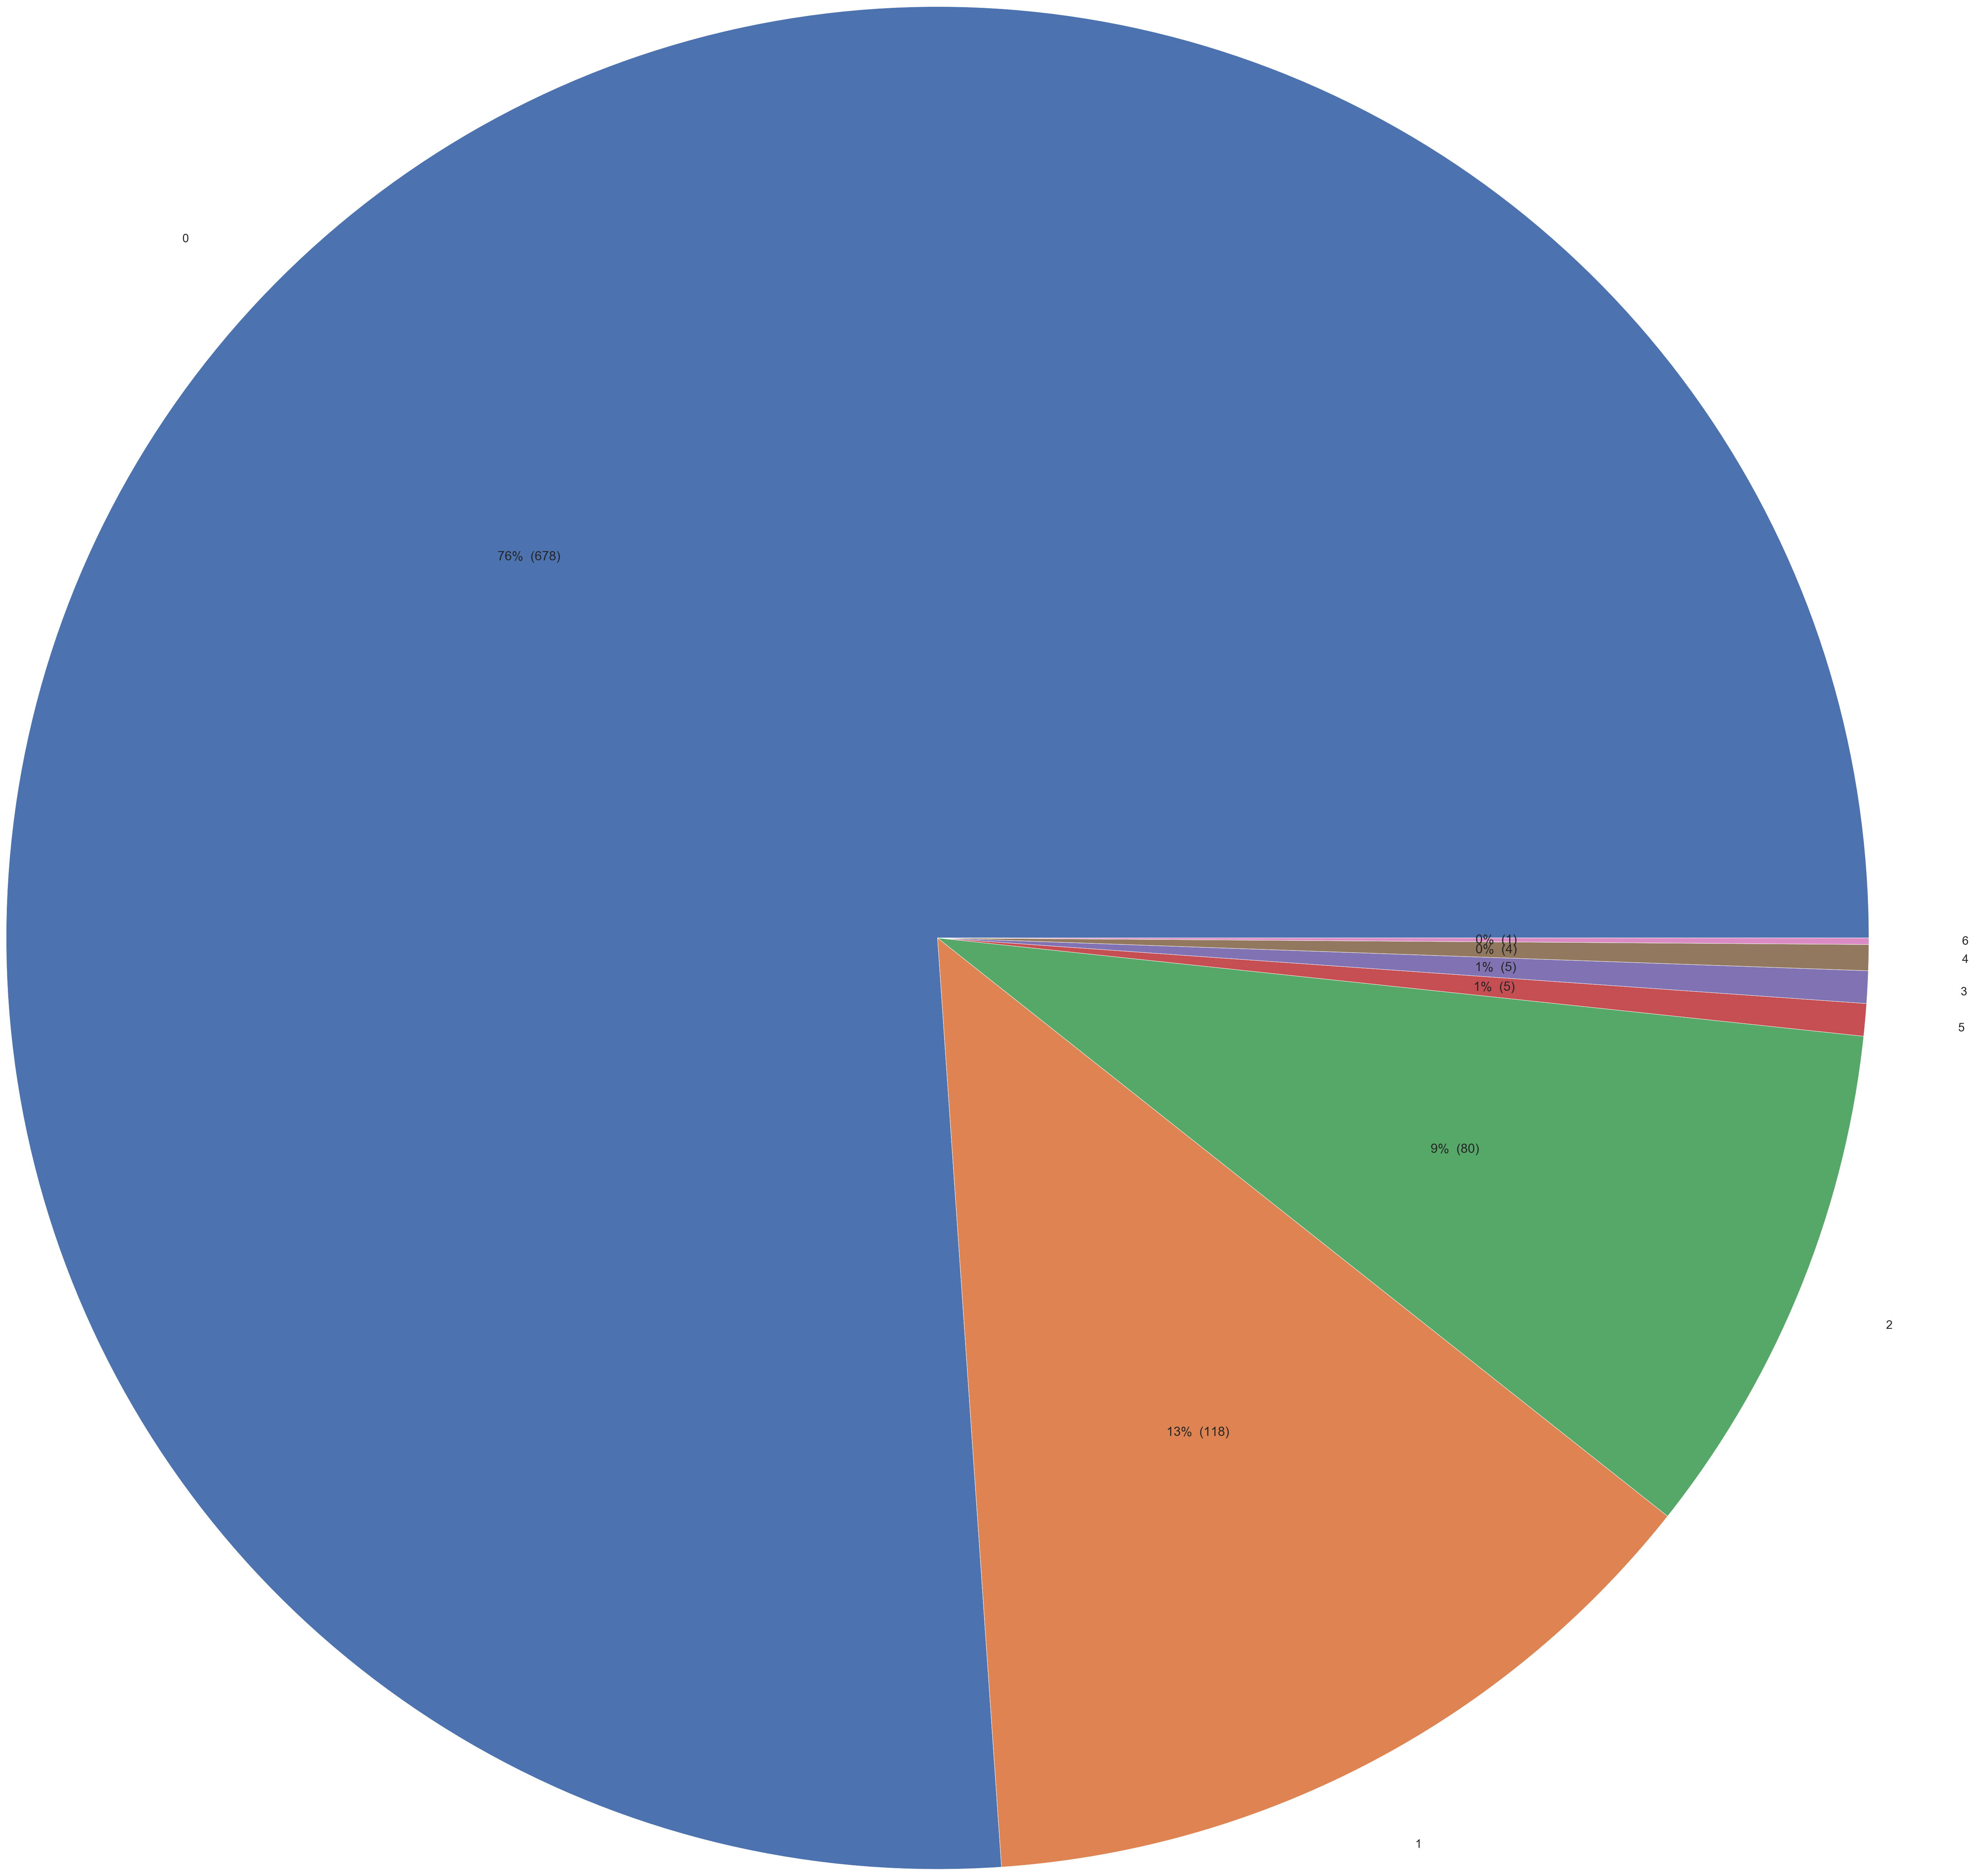

In [101]:
Parchs.plot.pie(autopct=make_autopct(Parchs.values) , radius = 6 )

In [96]:
Cabins  = df["Cabin"].value_counts()[:25]
Cabins

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
D              3
F2             3
E101           3
C93            2
B49            2
B58 B60        2
B22            2
C123           2
B28            2
E67            2
C126           2
D36            2
B18            2
D33            2
D20            2
B77            2
F G73          2
B20            2
C52            2
E44            2
Name: Cabin, dtype: int64

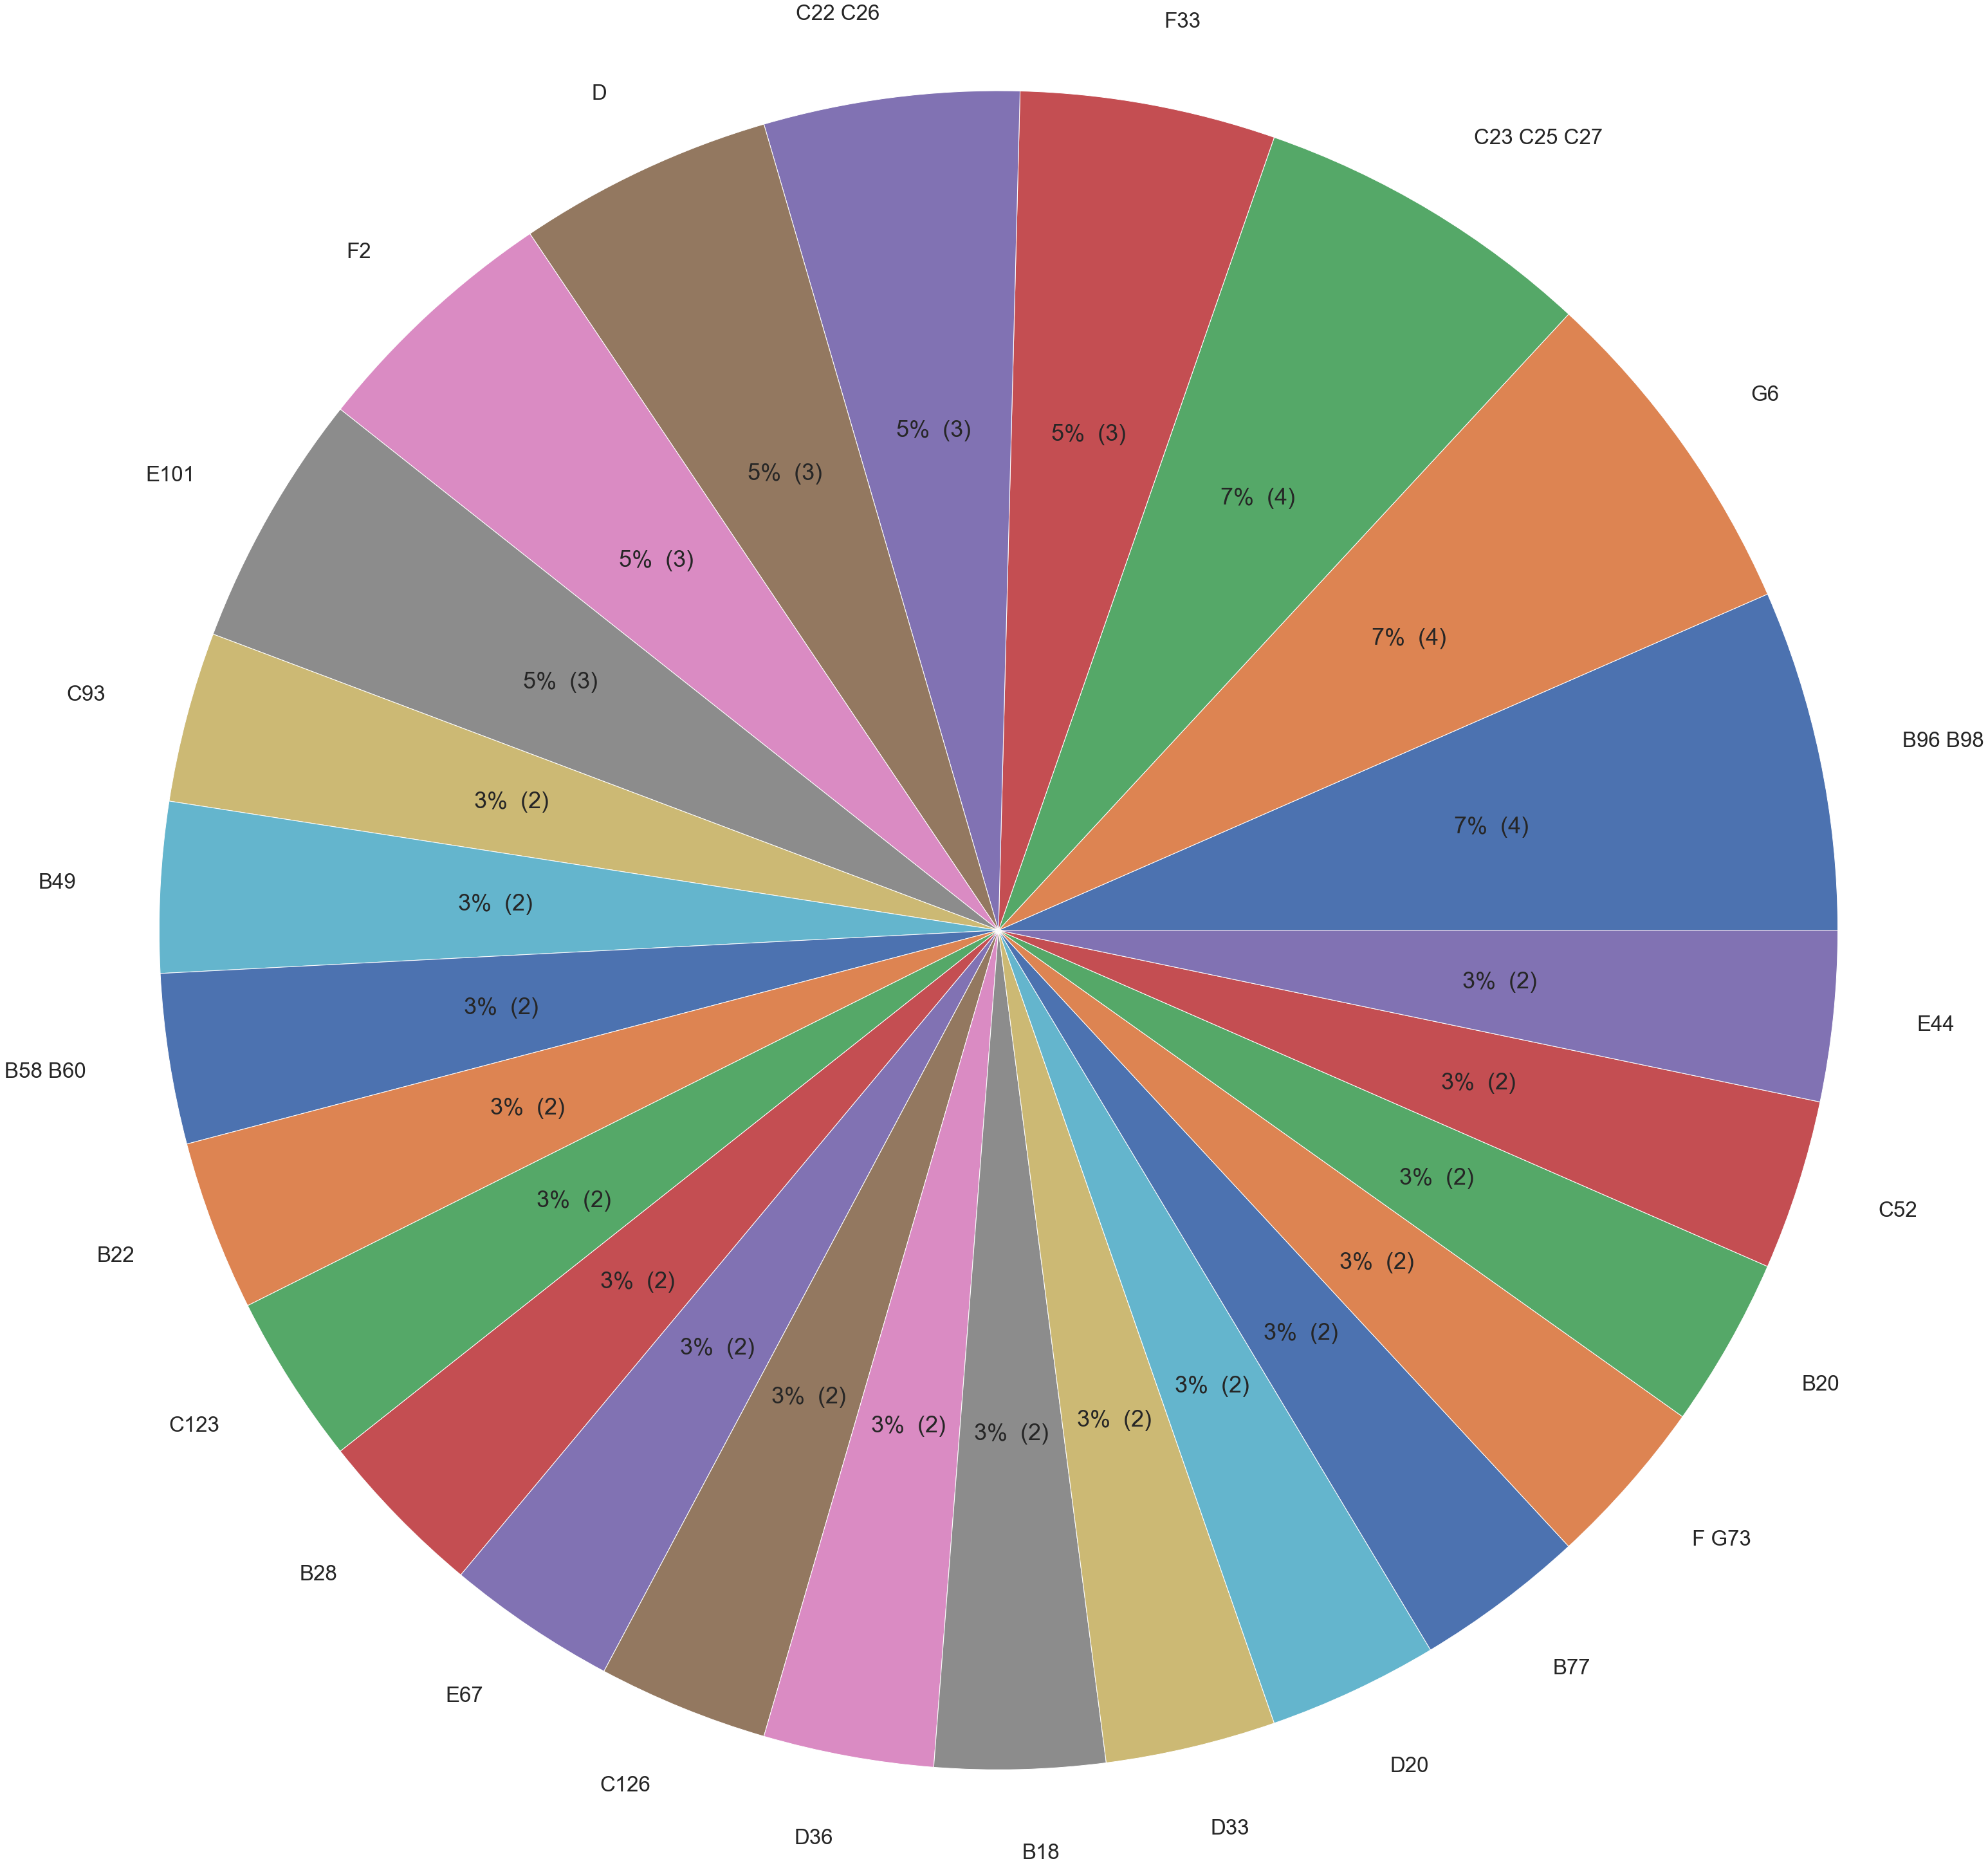

In [98]:
Cabins.plot.pie(autopct=make_autopct(Cabins.values) , radius = 3 )

In [102]:
Embarkes = df["Embarked"].value_counts()
Embarkes

S    644
C    168
Q     77
Name: Embarked, dtype: int64

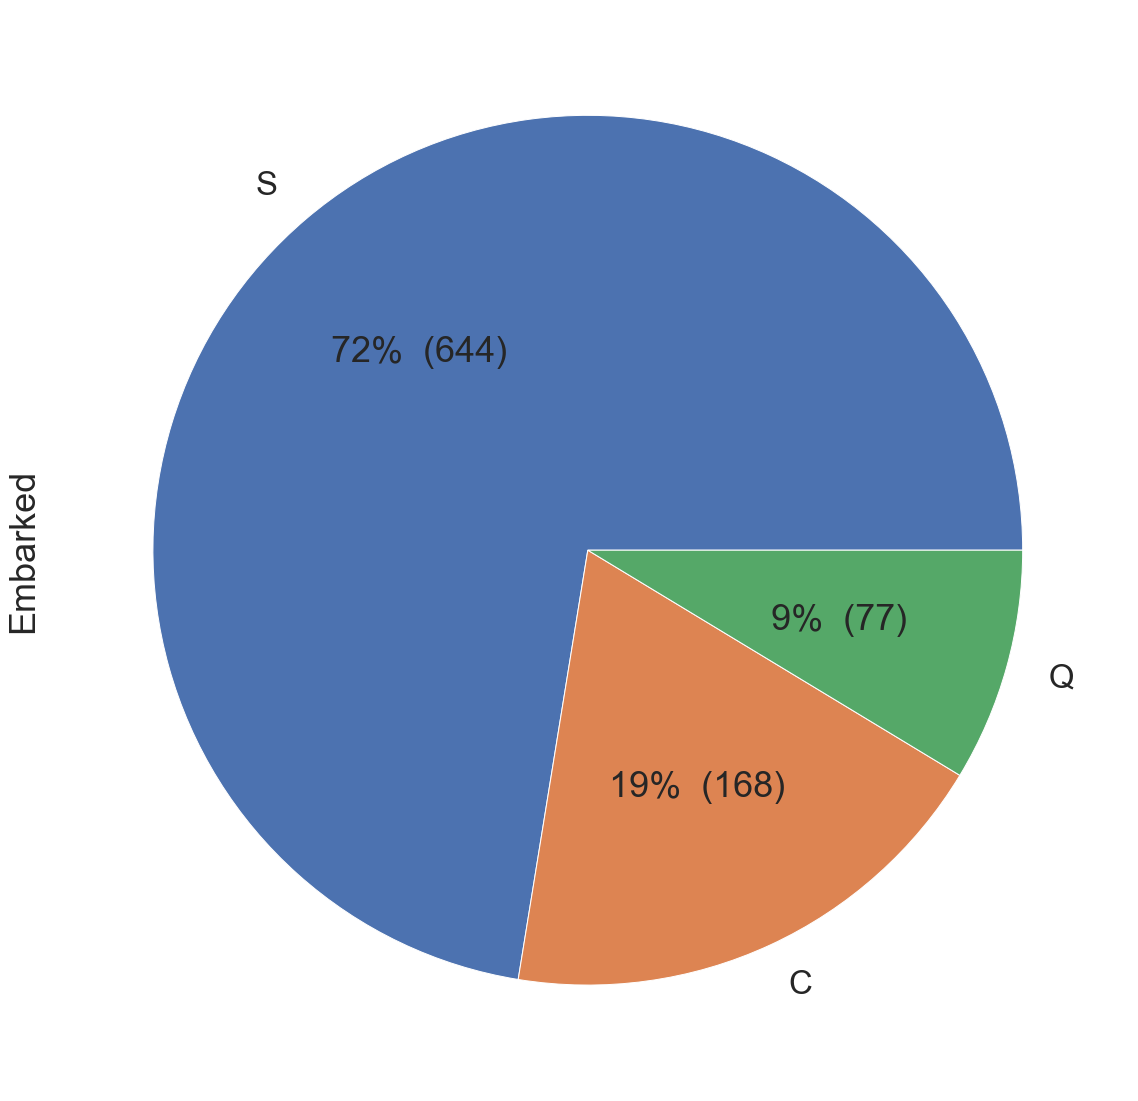

In [103]:
Embarkes.plot.pie(autopct=make_autopct(Embarkes.values) )

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


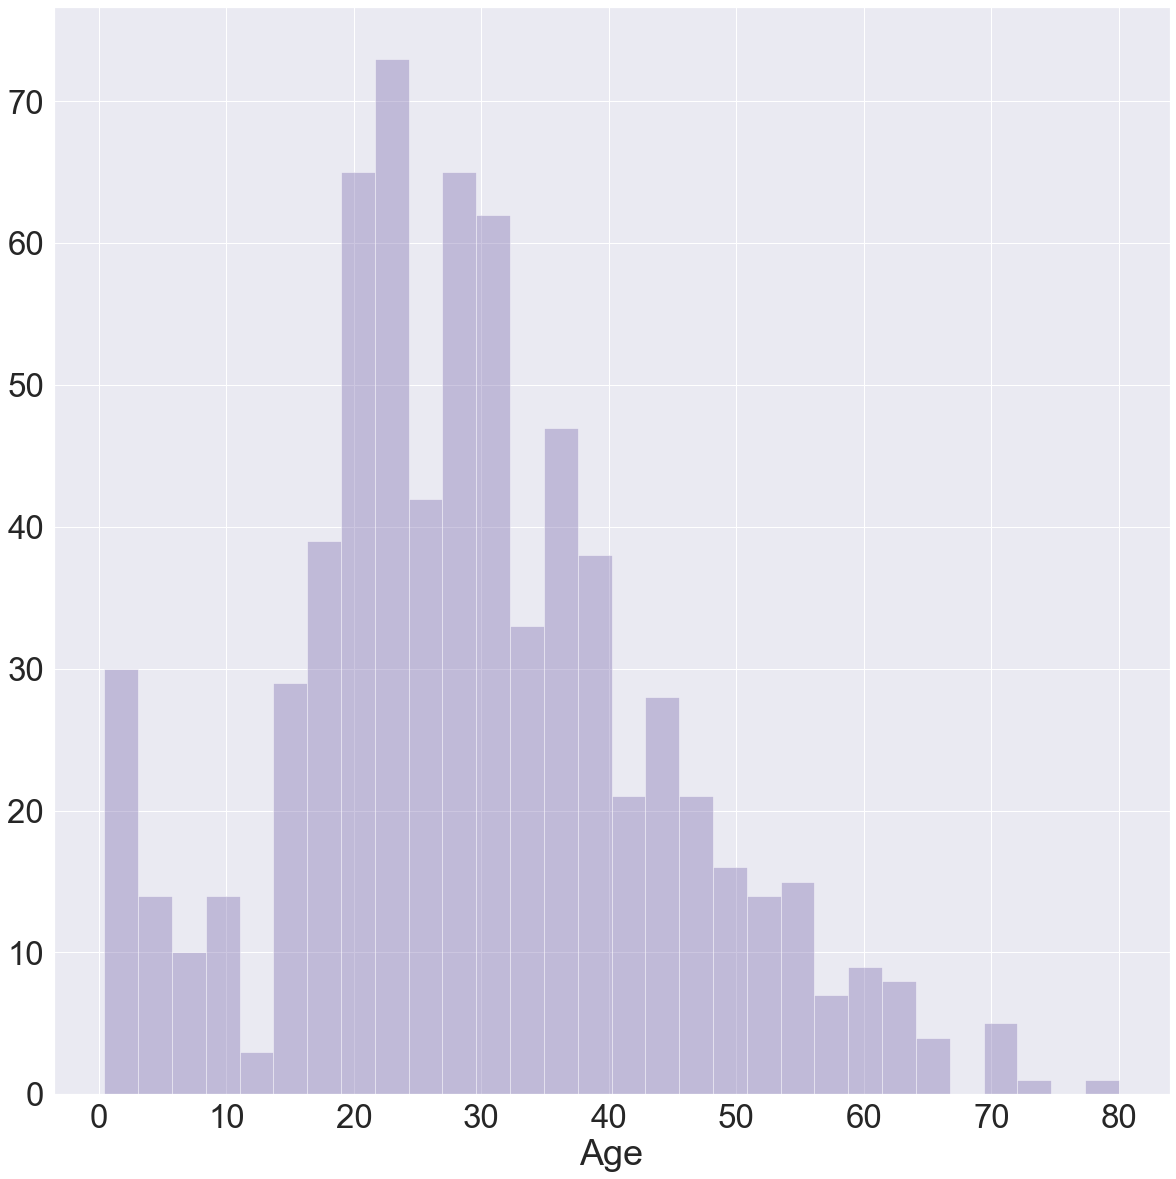

In [104]:
sns.distplot(df['Age'], kde=False, bins=30, color='m')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


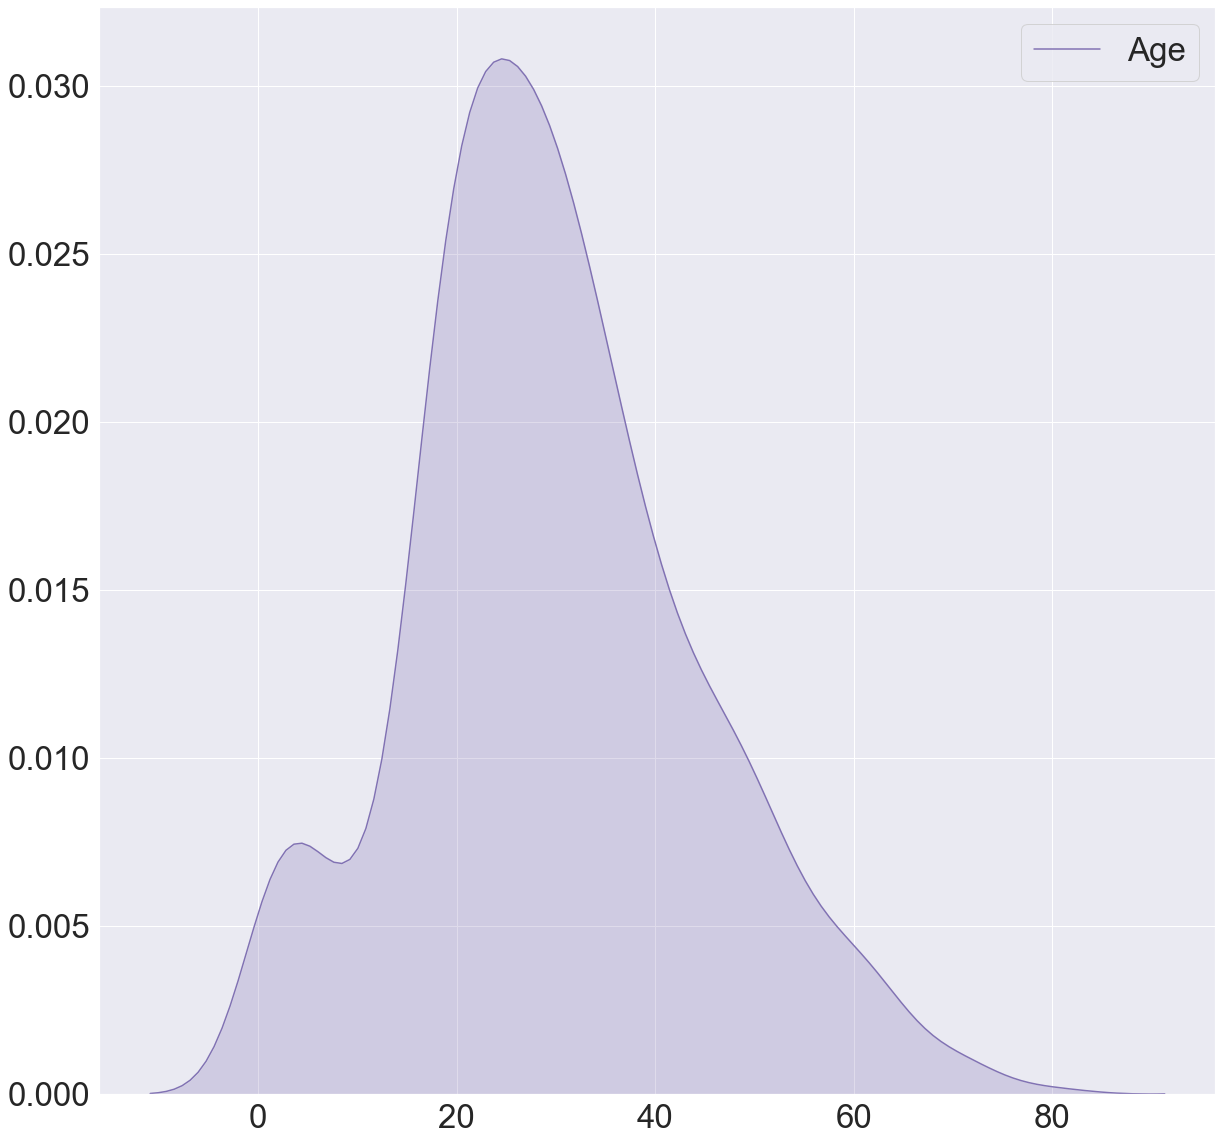

In [105]:
sns.kdeplot(df['Age'], shade=True, color='m')

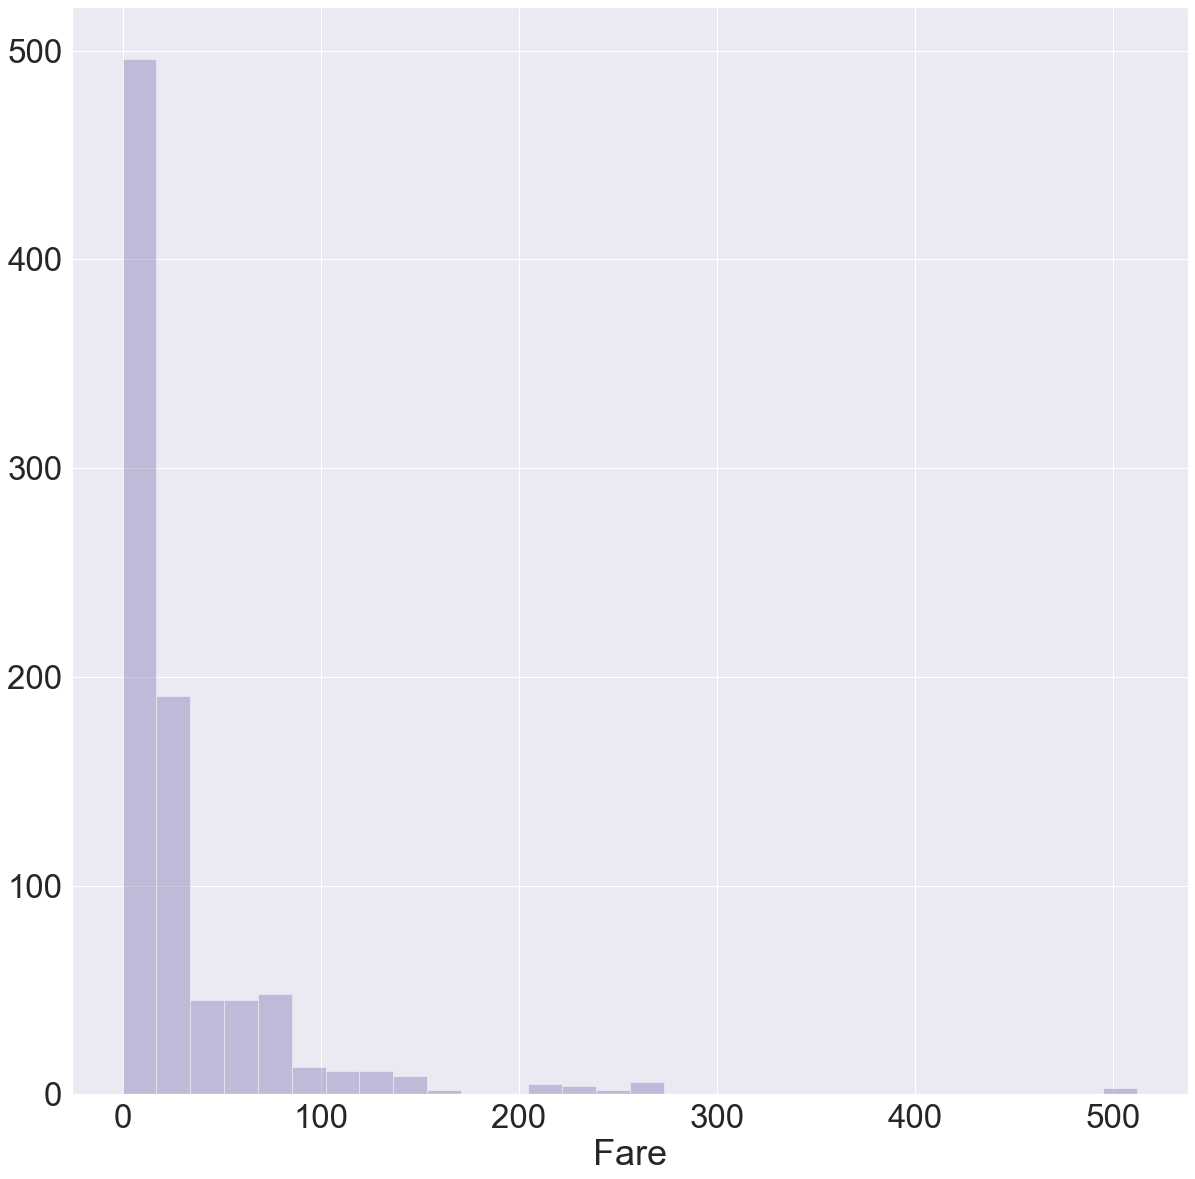

In [107]:
sns.distplot(df['Fare'], kde=False, bins=30, color='m')

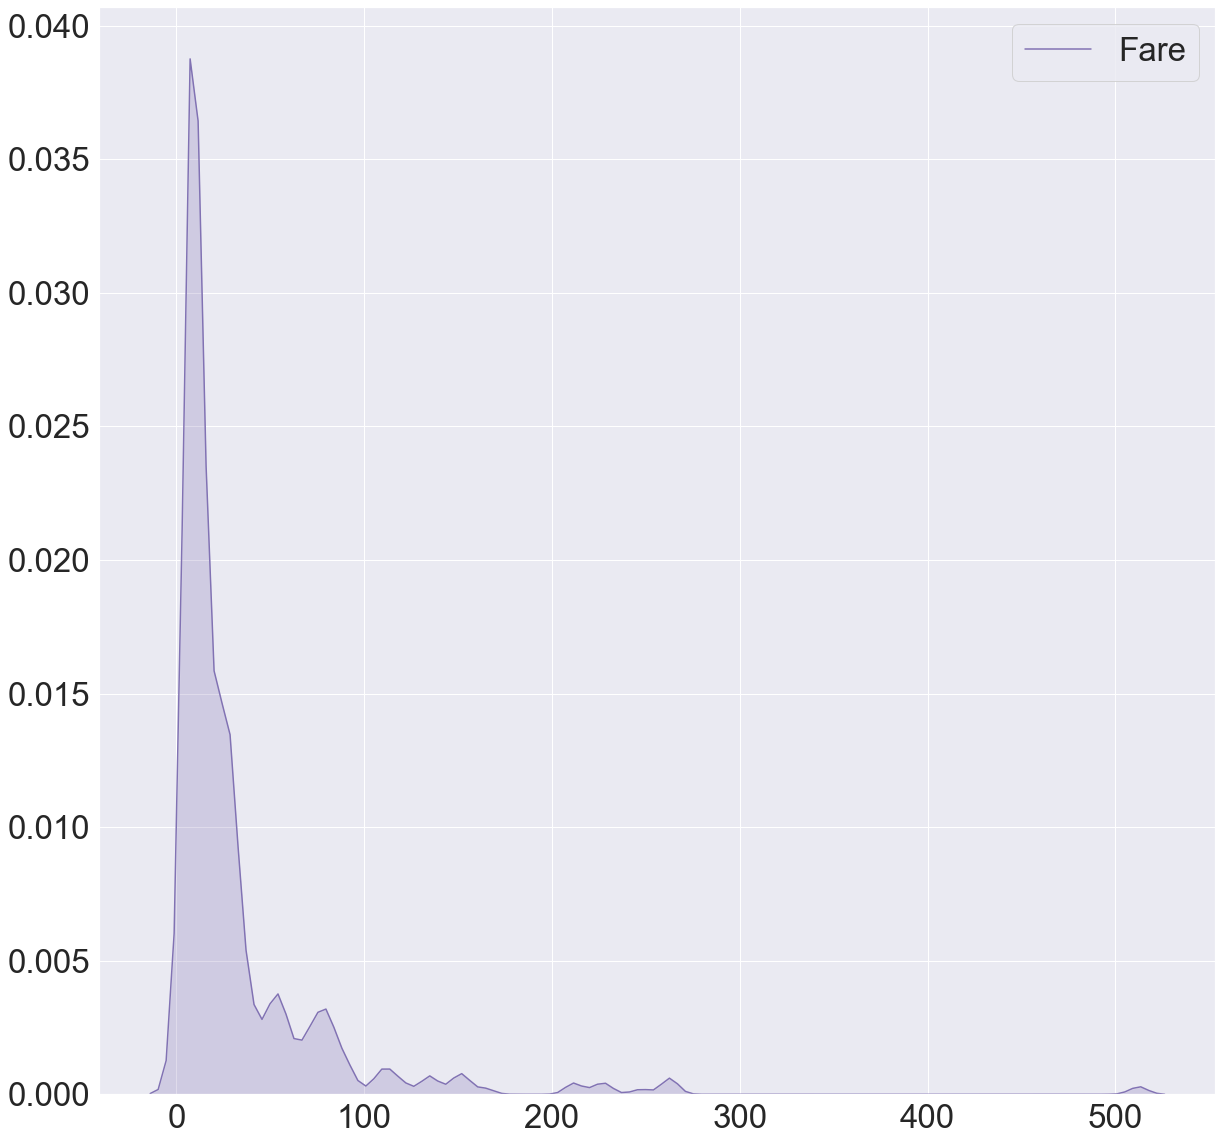

In [108]:
sns.kdeplot(df['Fare'], shade=True, color='m')

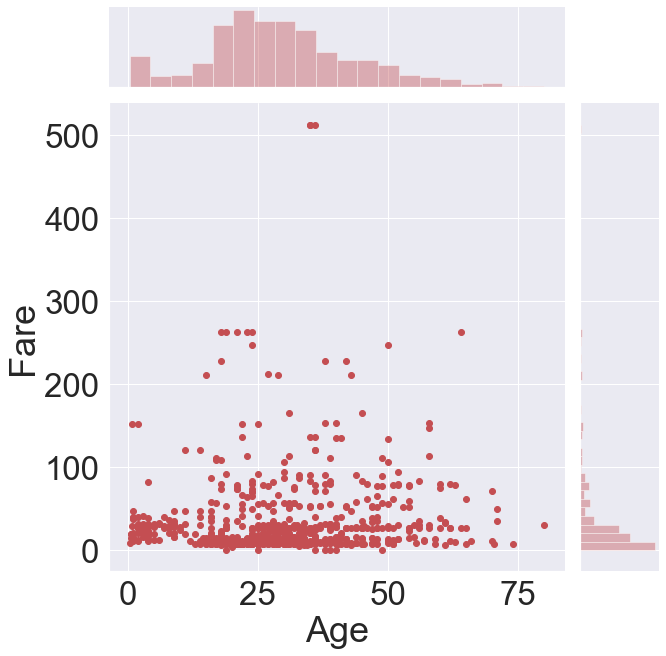

In [111]:
sns.jointplot(x='Age', y='Fare', data=df, color='r' , height=10)

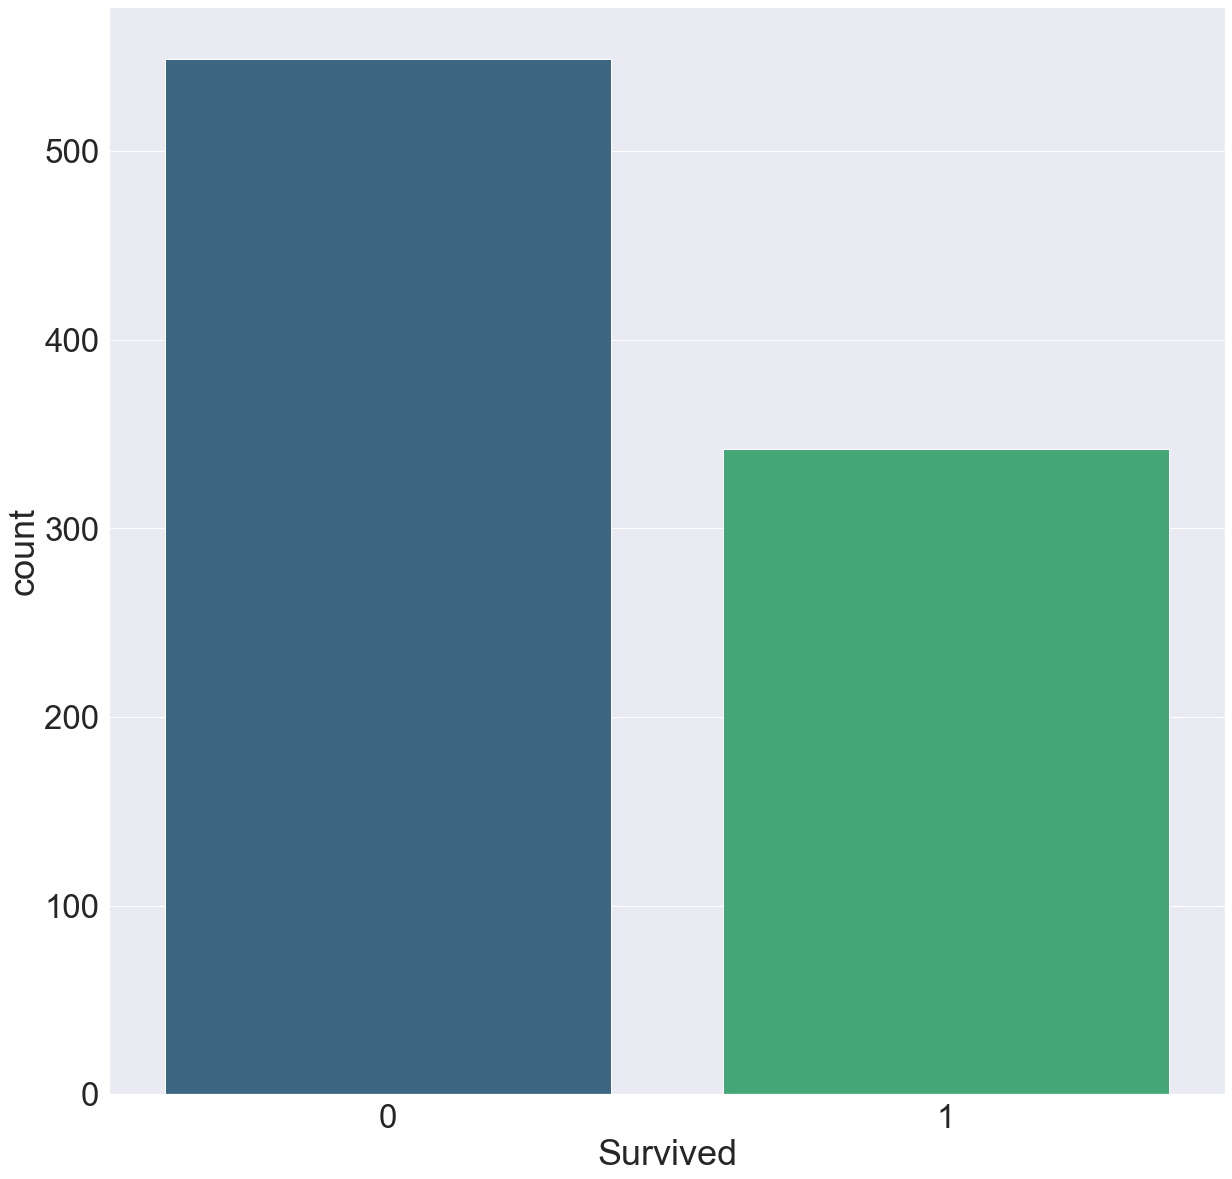

In [112]:
sns.countplot(x='Survived', data=df, palette='viridis')

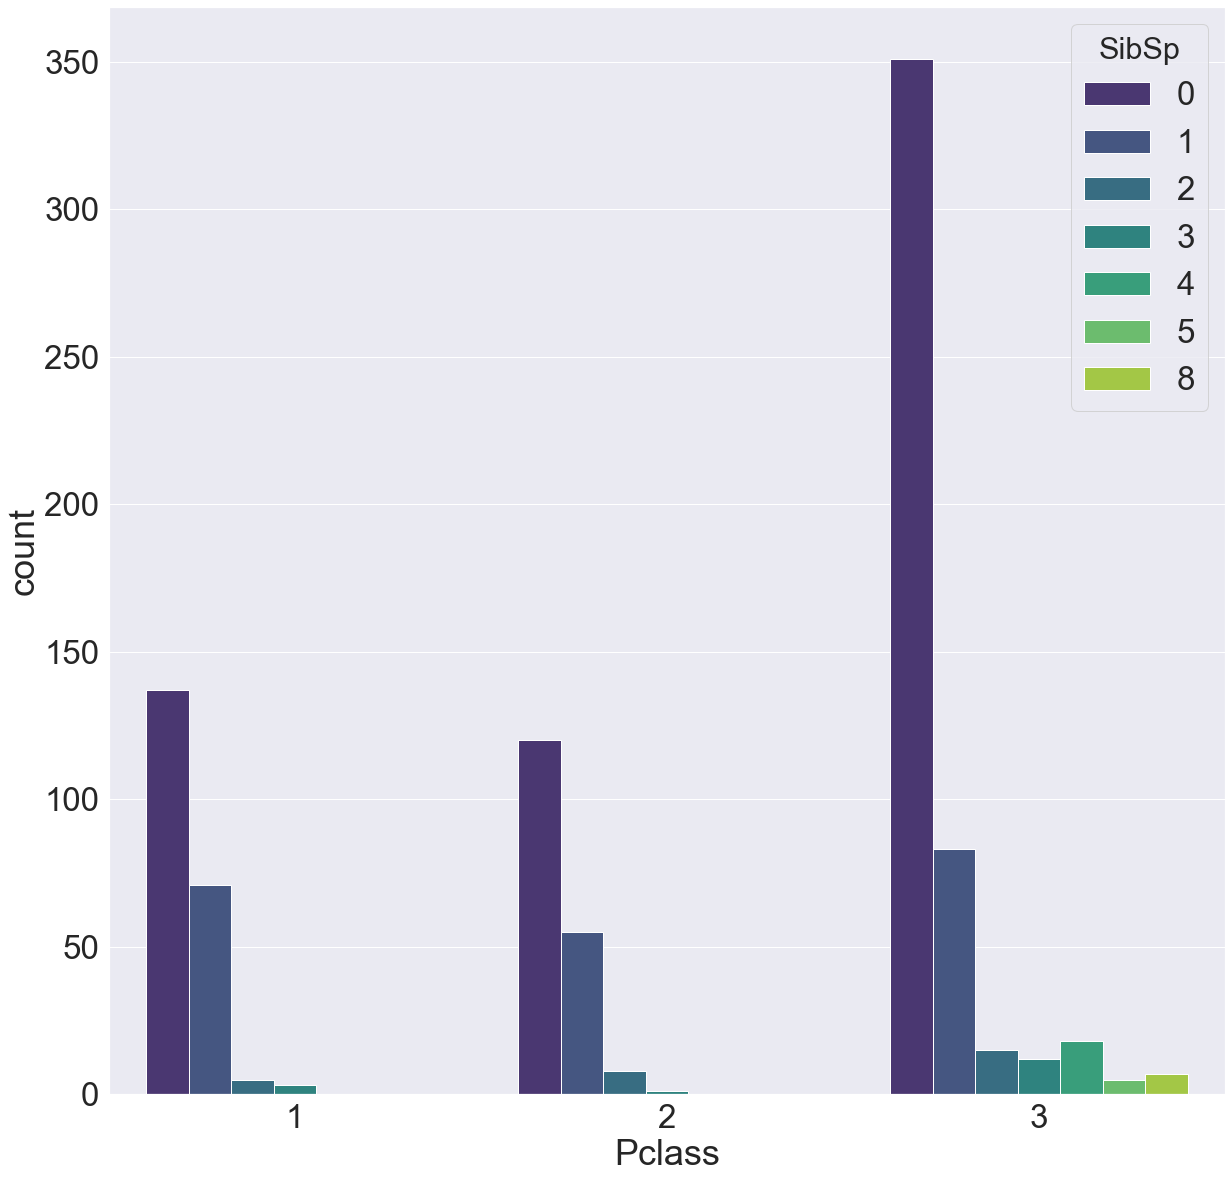

In [115]:
sns.countplot(x='Pclass', data=df, hue='SibSp', palette='viridis')

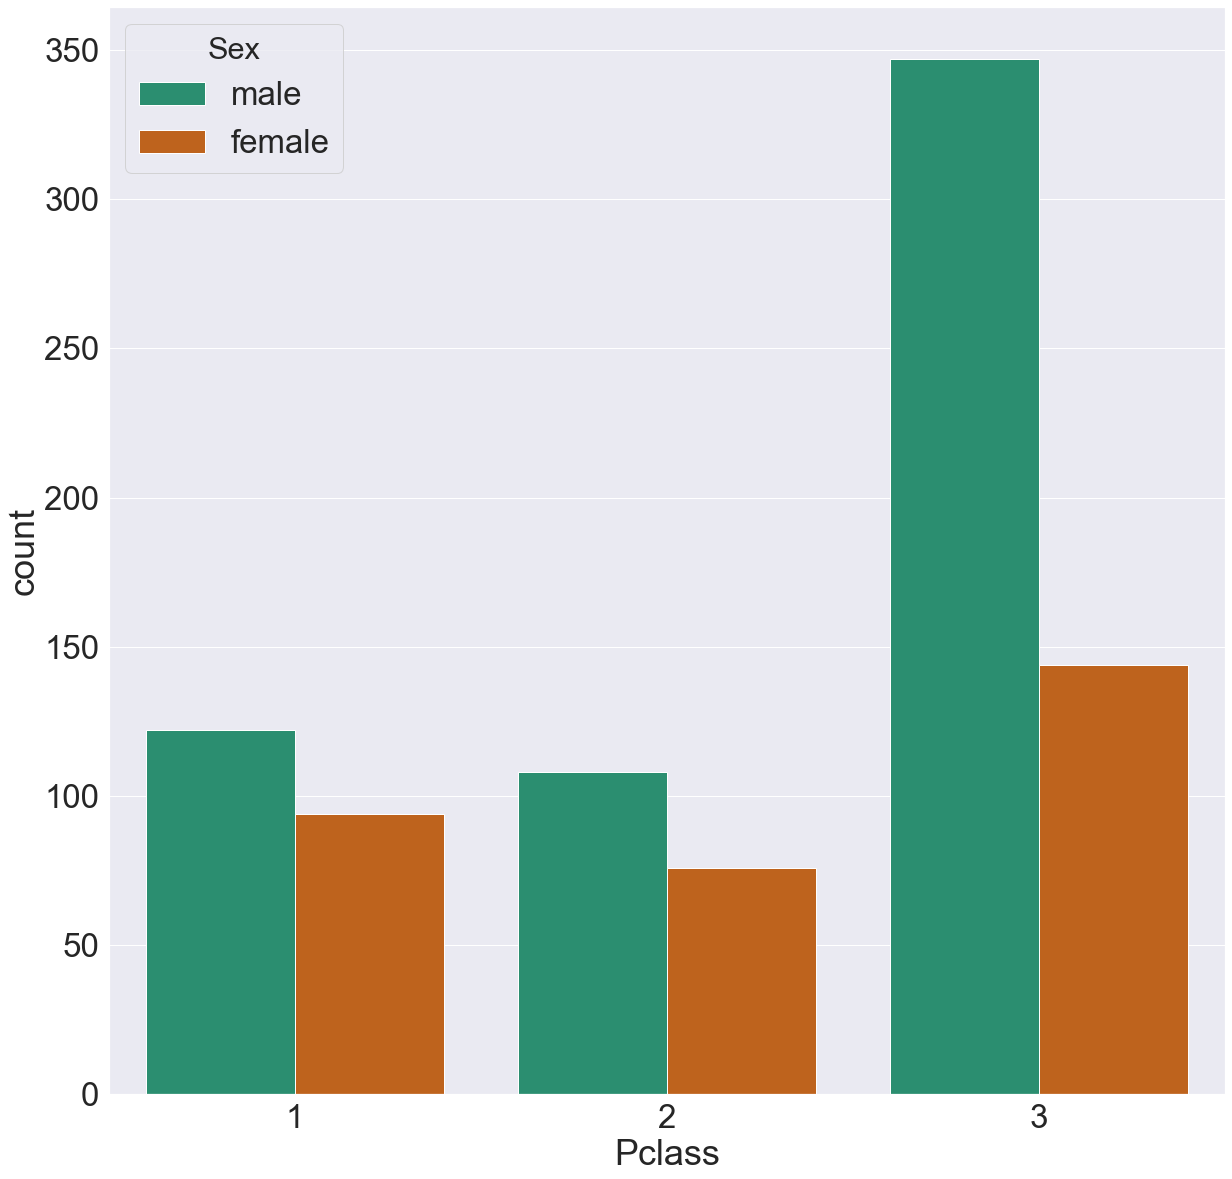

In [114]:
sns.countplot(x='Pclass', data=df, hue='Sex', palette='Dark2')

In [133]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

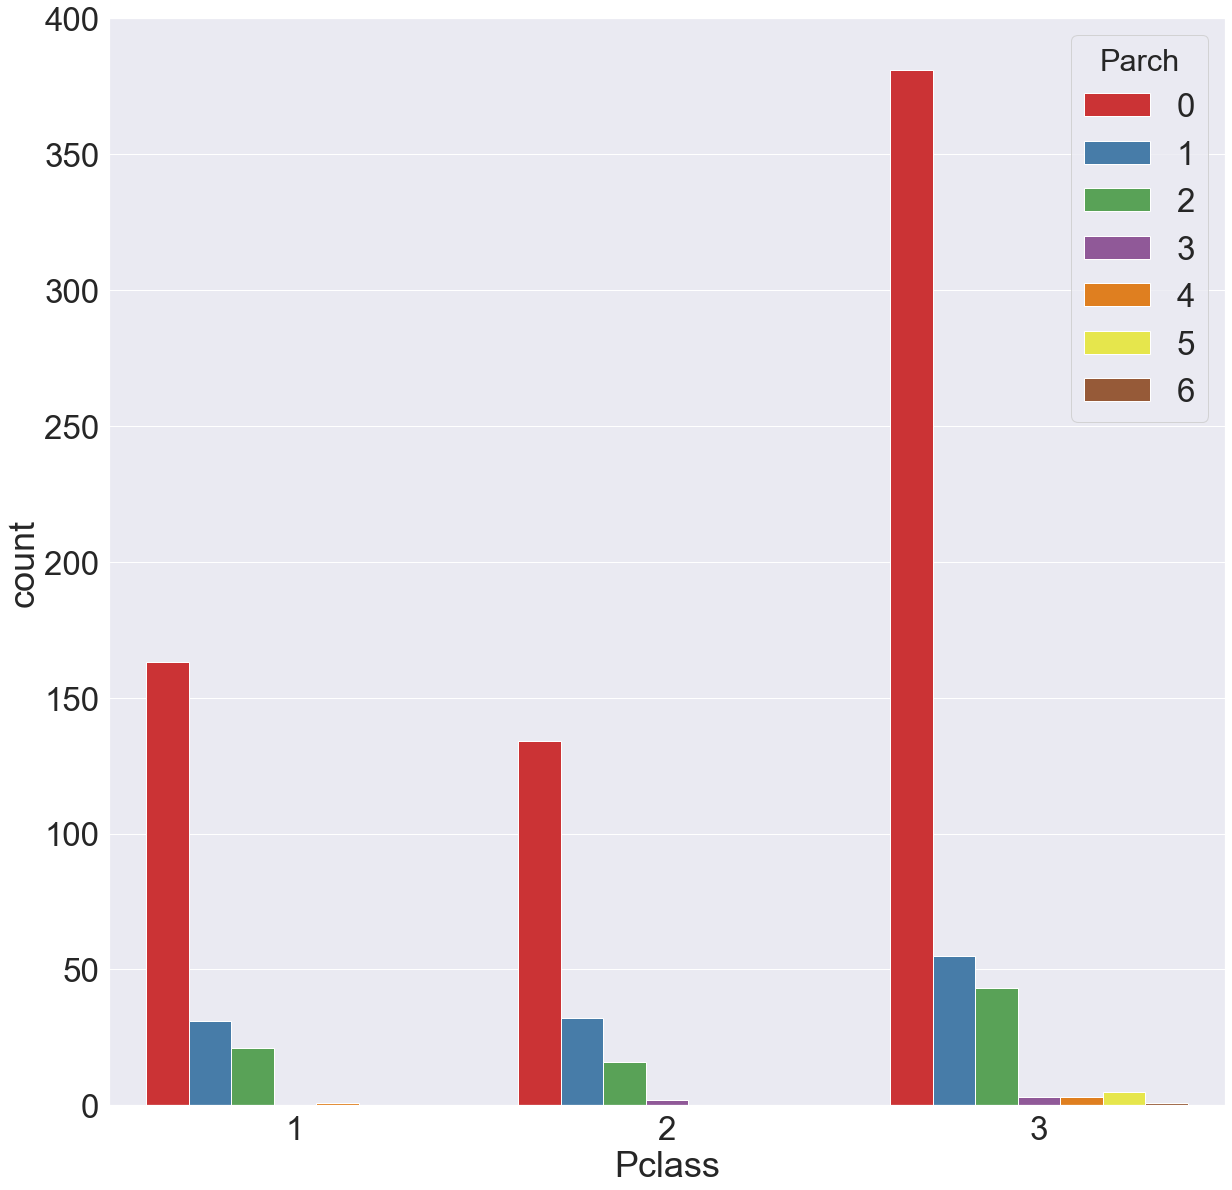

In [136]:
sns.countplot(x='Pclass', data=df, hue='Parch', palette='Set1')

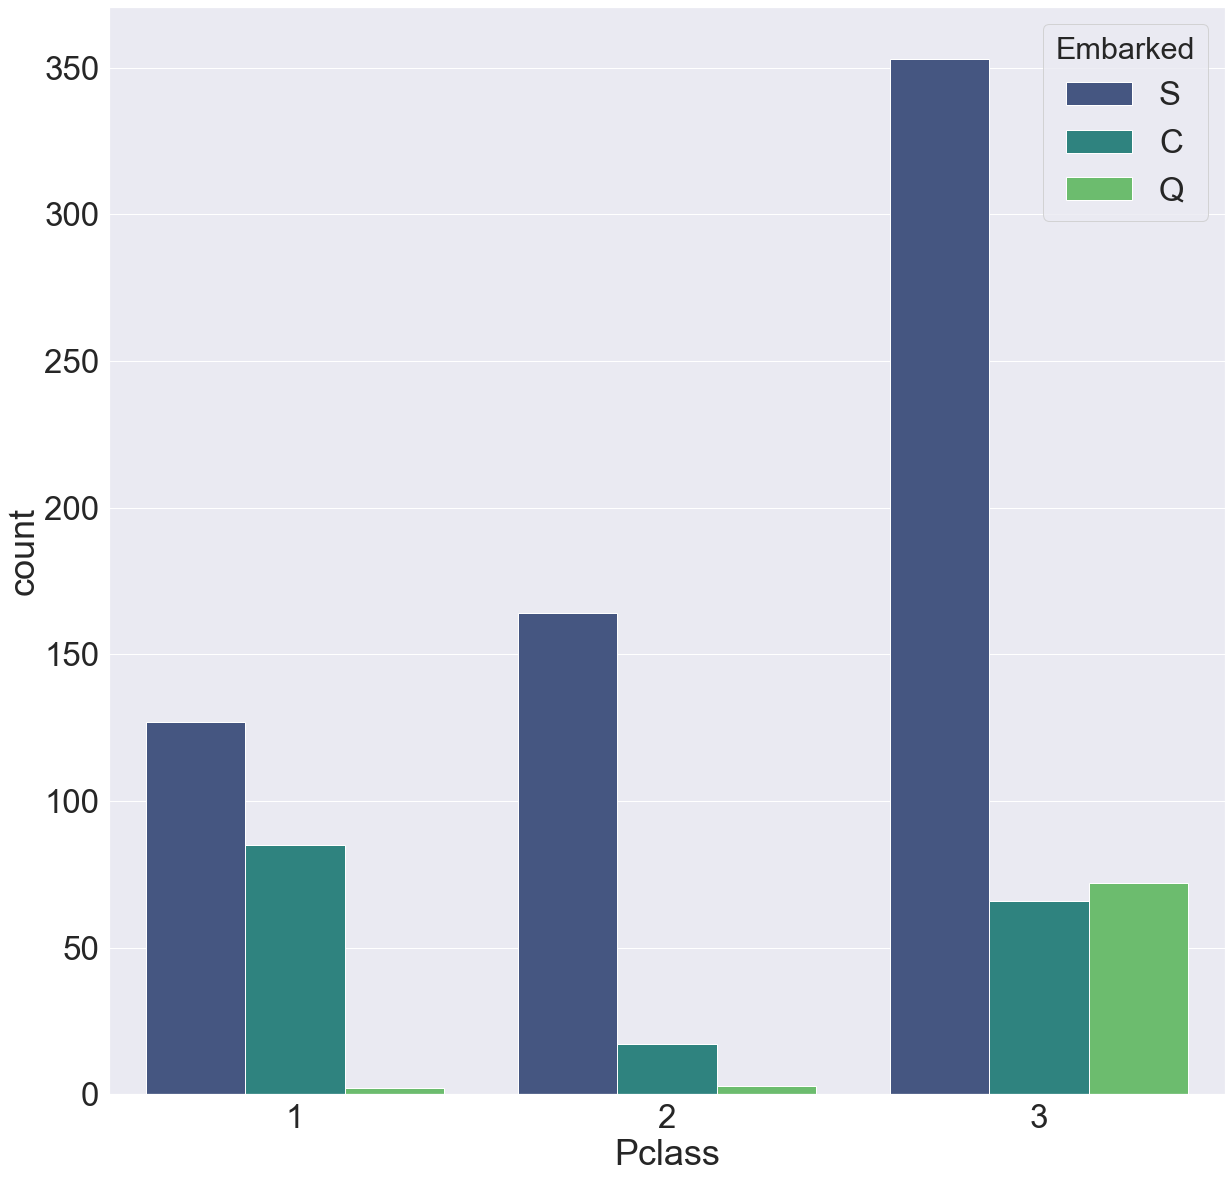

In [140]:
sns.countplot(x='Pclass', data=df, hue='Embarked', palette='viridis')

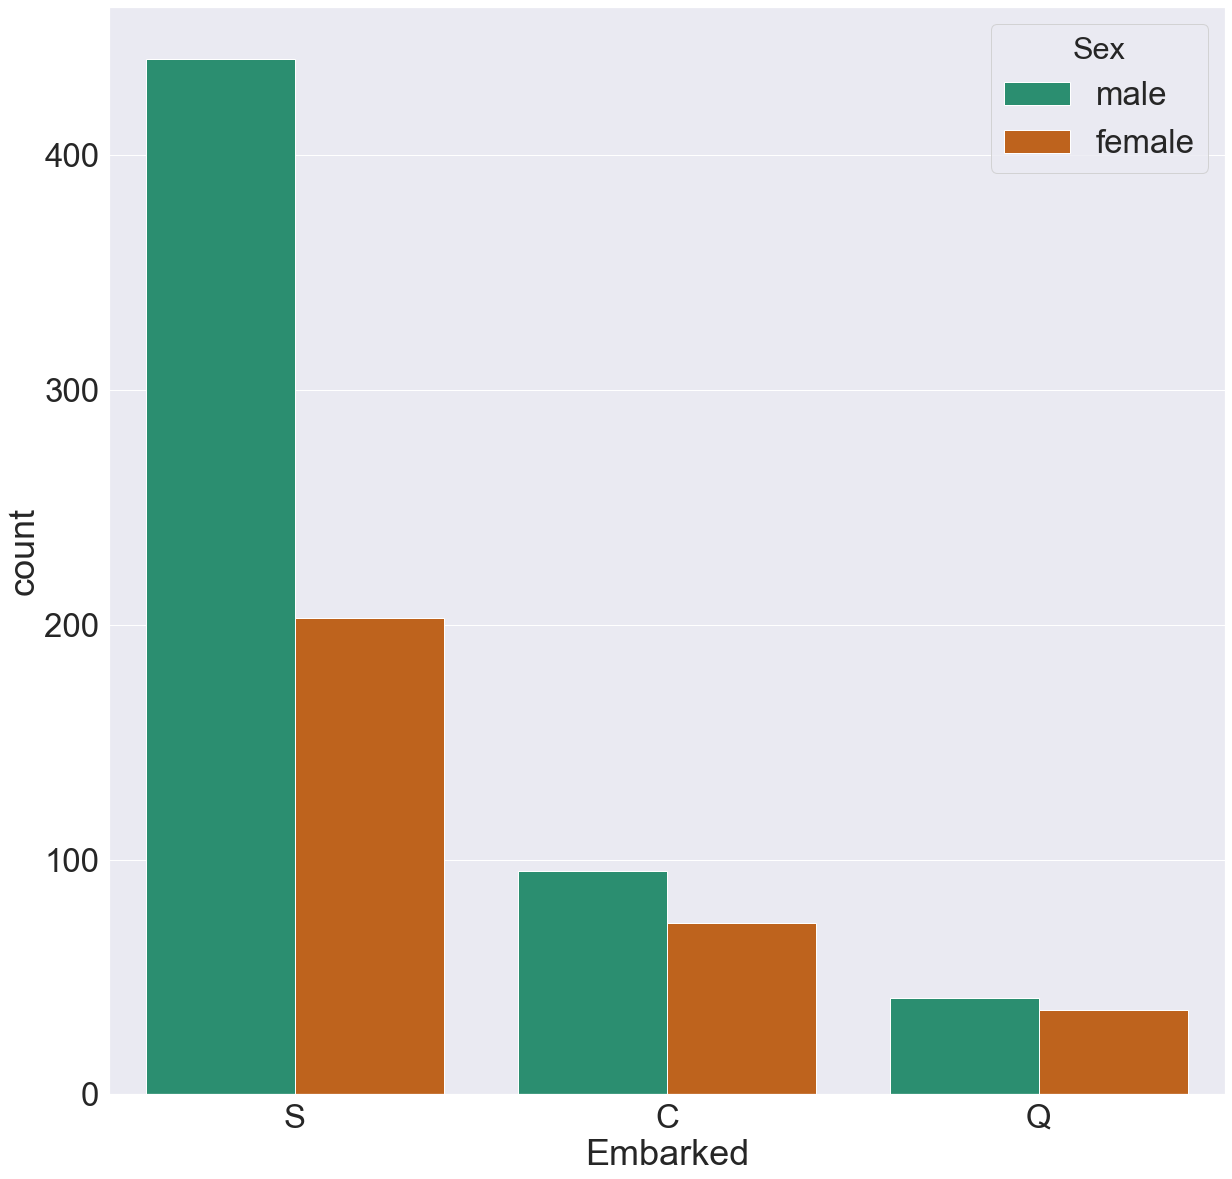

In [139]:
sns.countplot(x='Embarked', data=df, hue='Sex', palette='Dark2')

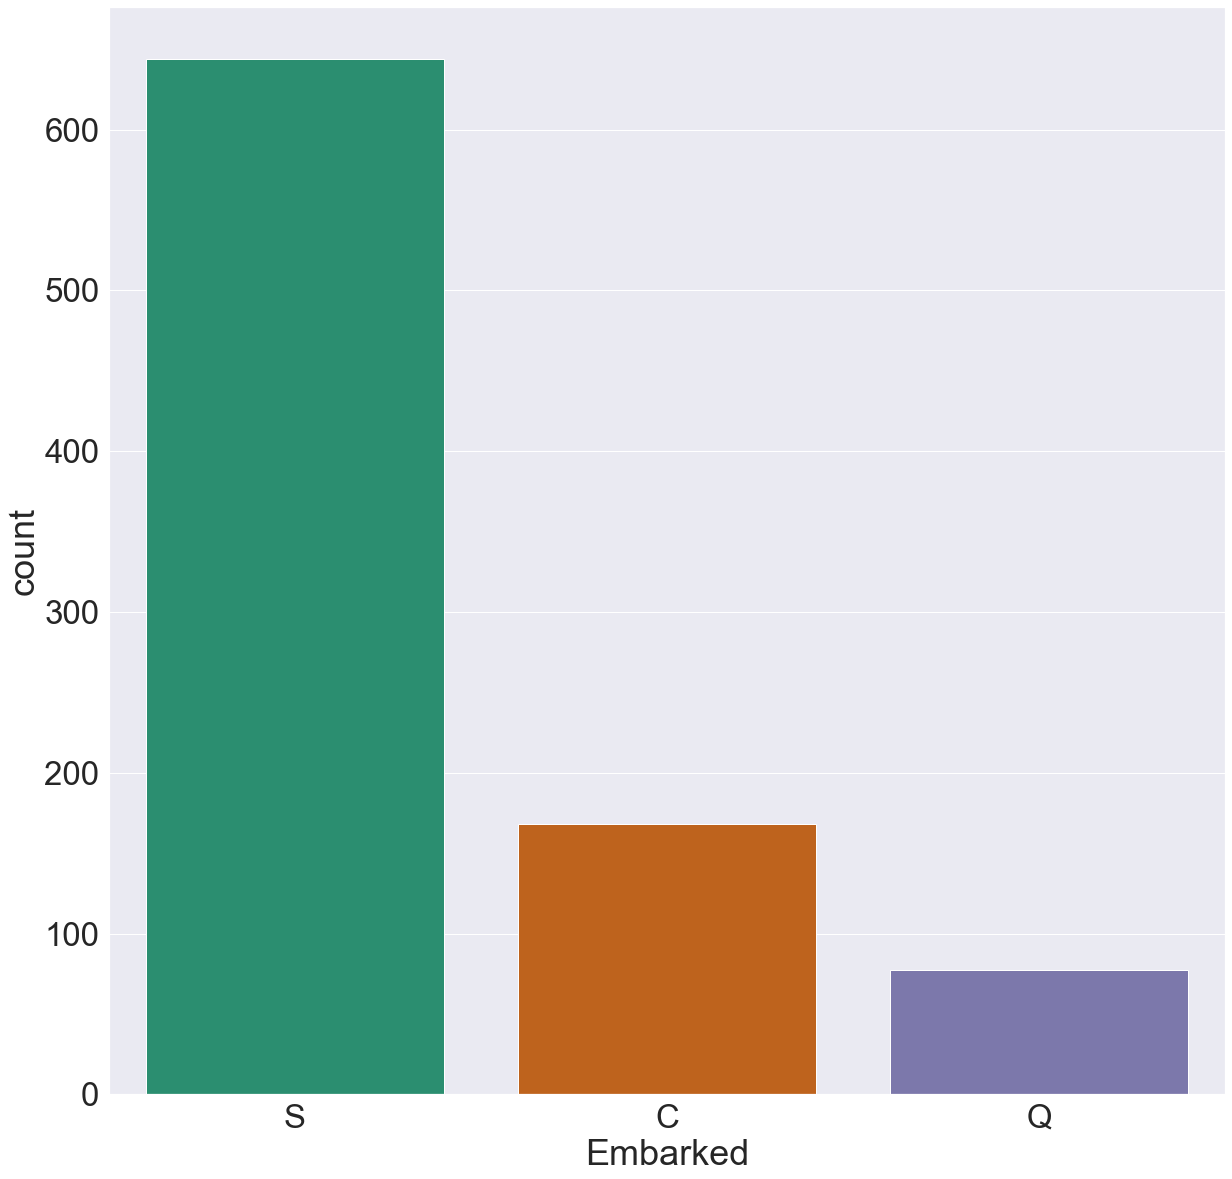

In [132]:
sns.countplot(x='Embarked', data=df  , palette = "Dark2")

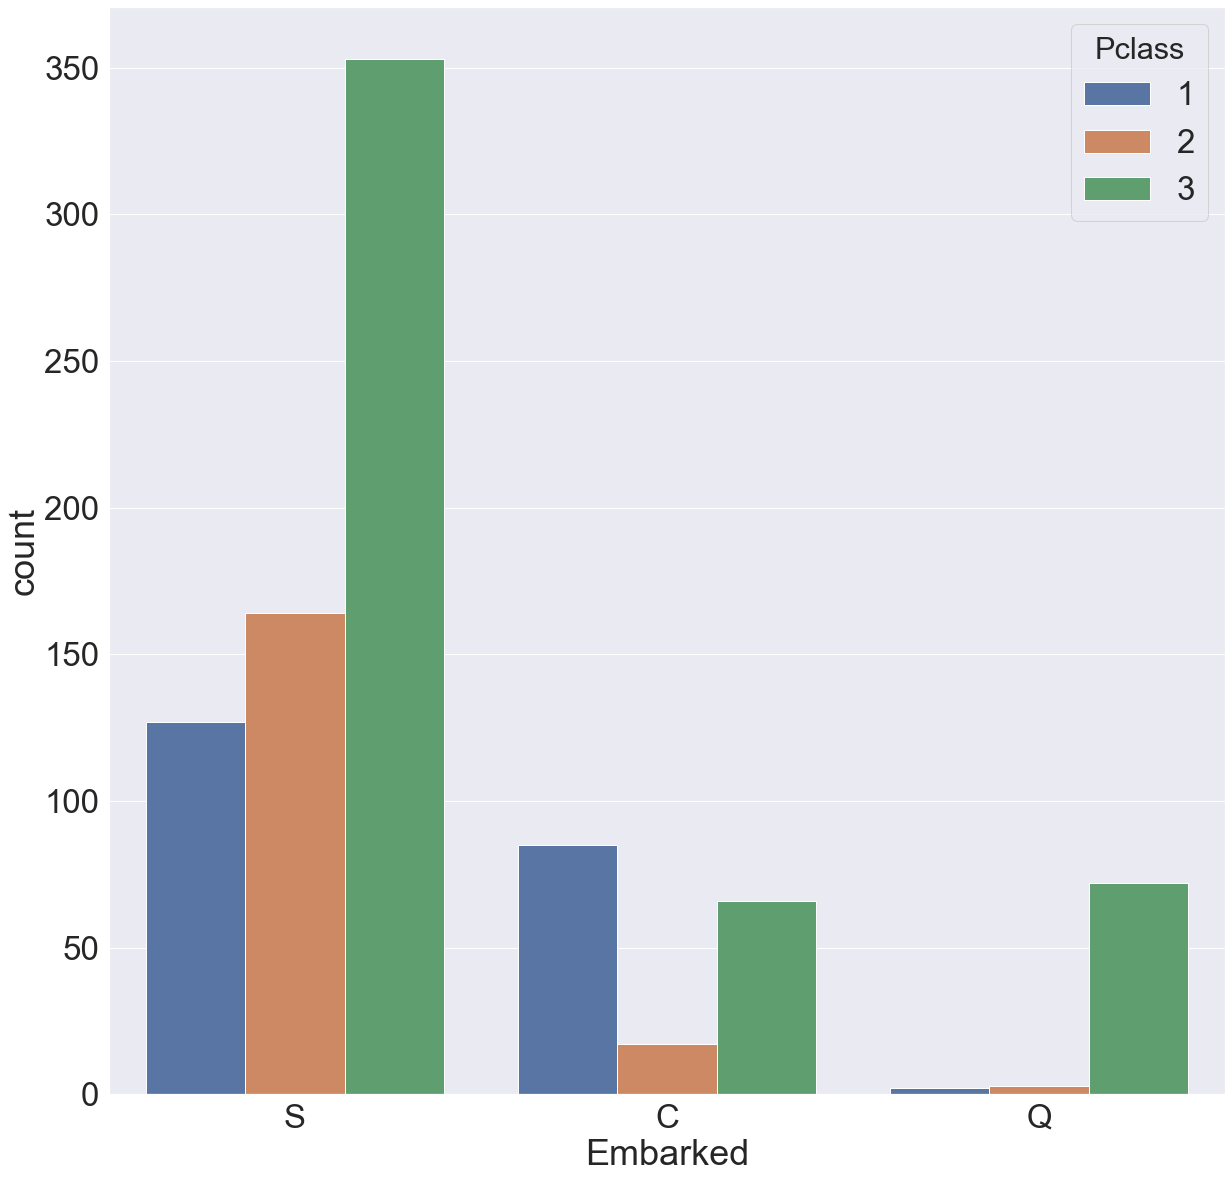

In [141]:
sns.countplot(x='Embarked', data=df, hue='Pclass')

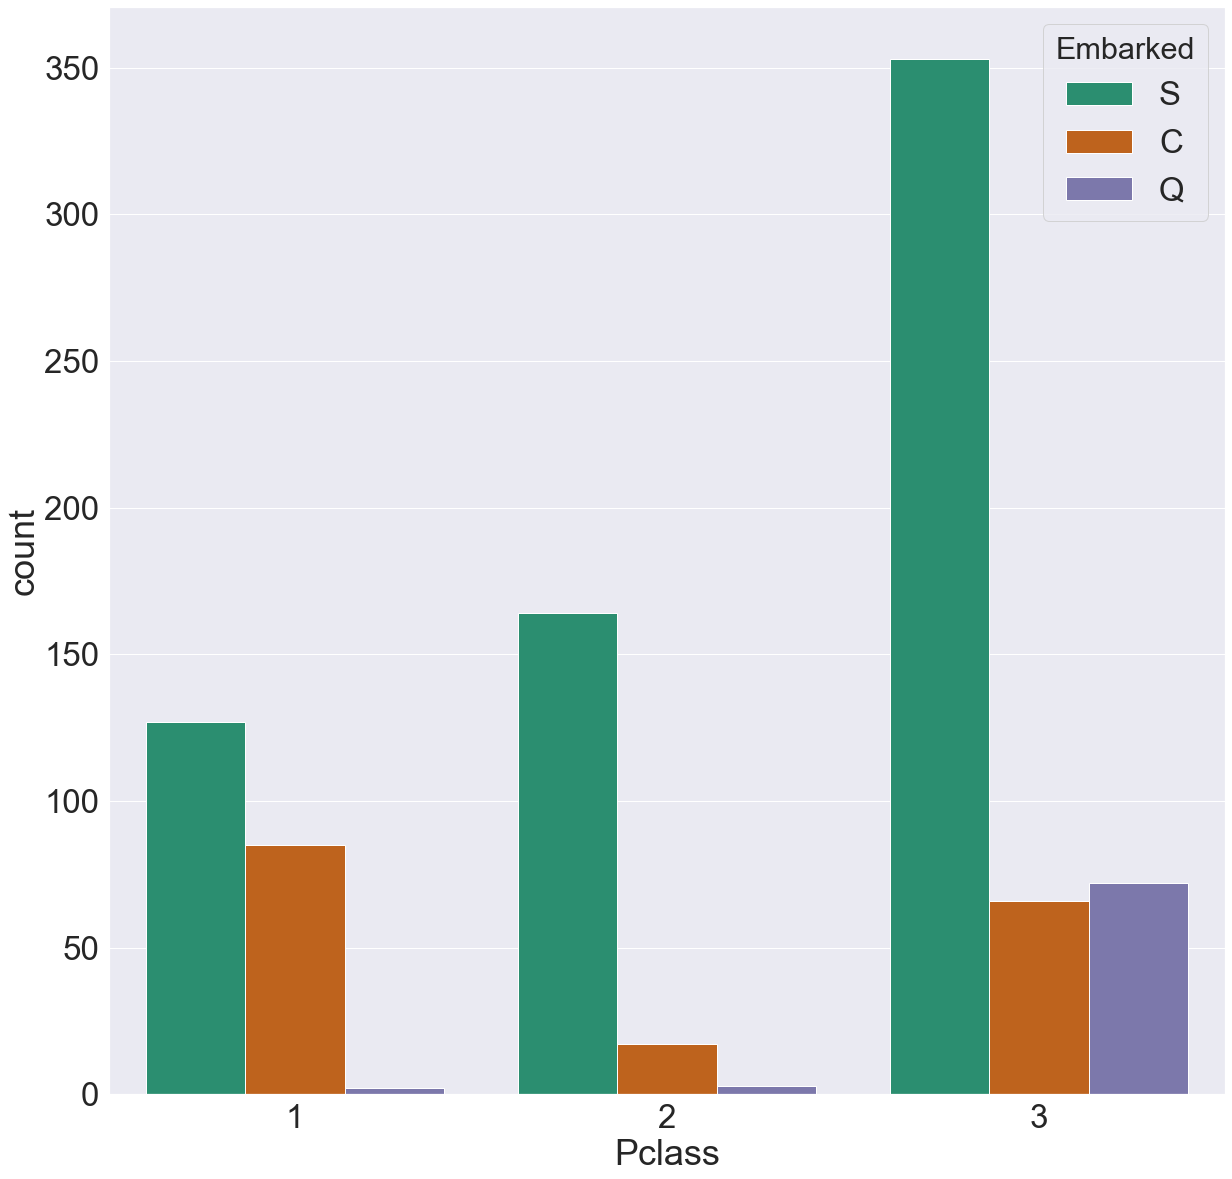

In [131]:
sns.countplot(x='Pclass', data=df, hue='Embarked', palette='Dark2')

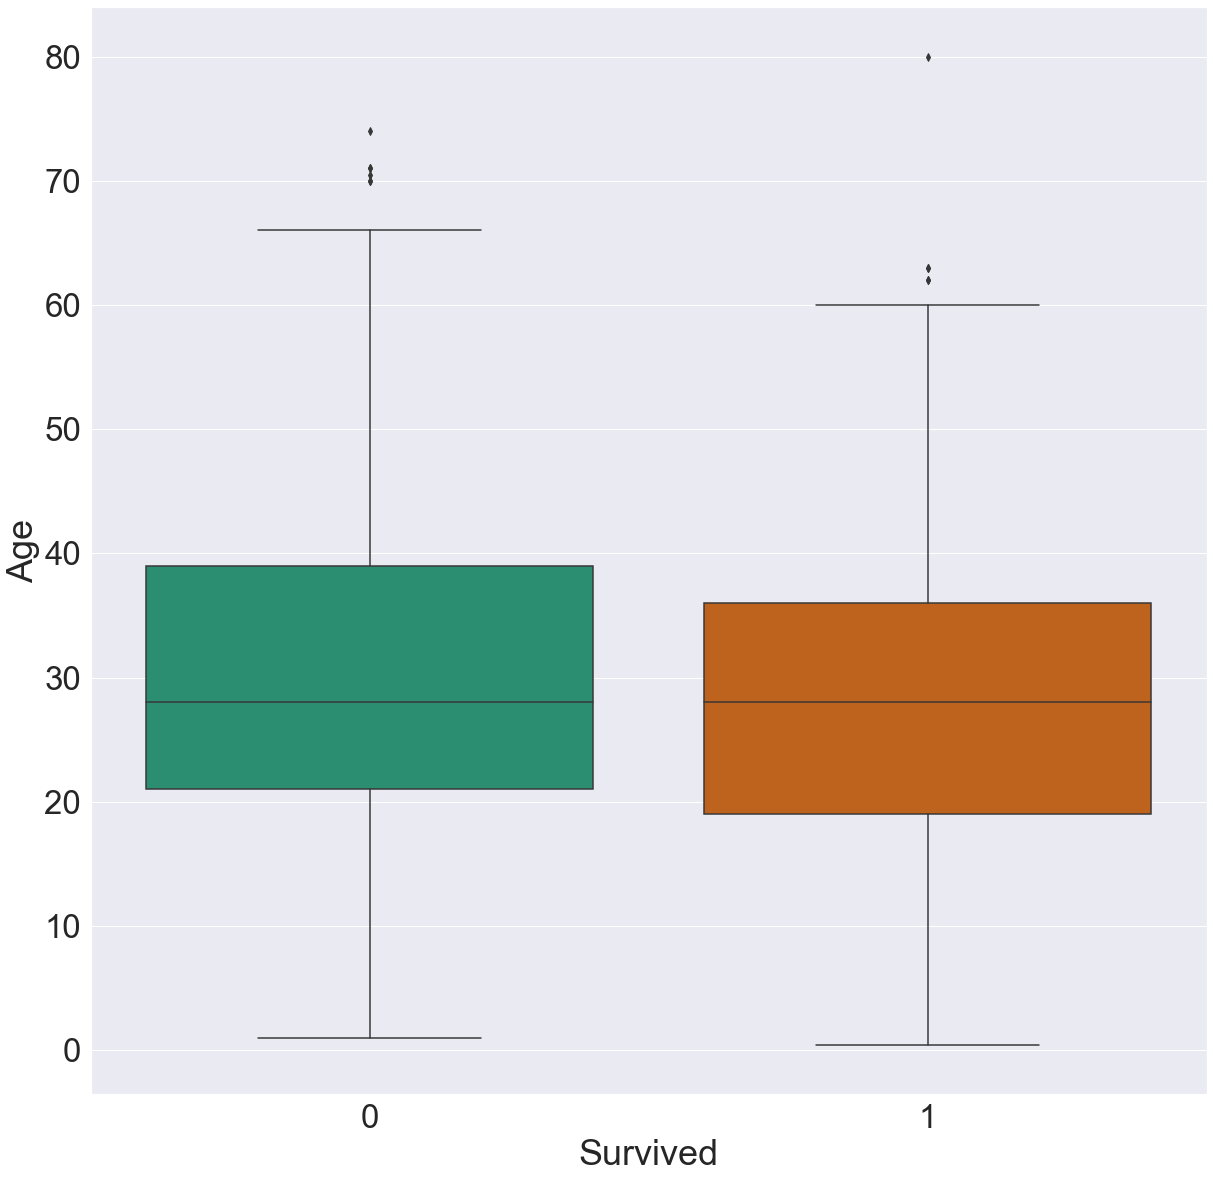

In [130]:
sns.boxplot(x='Survived', y='Age', data=df , palette = "Dark2")

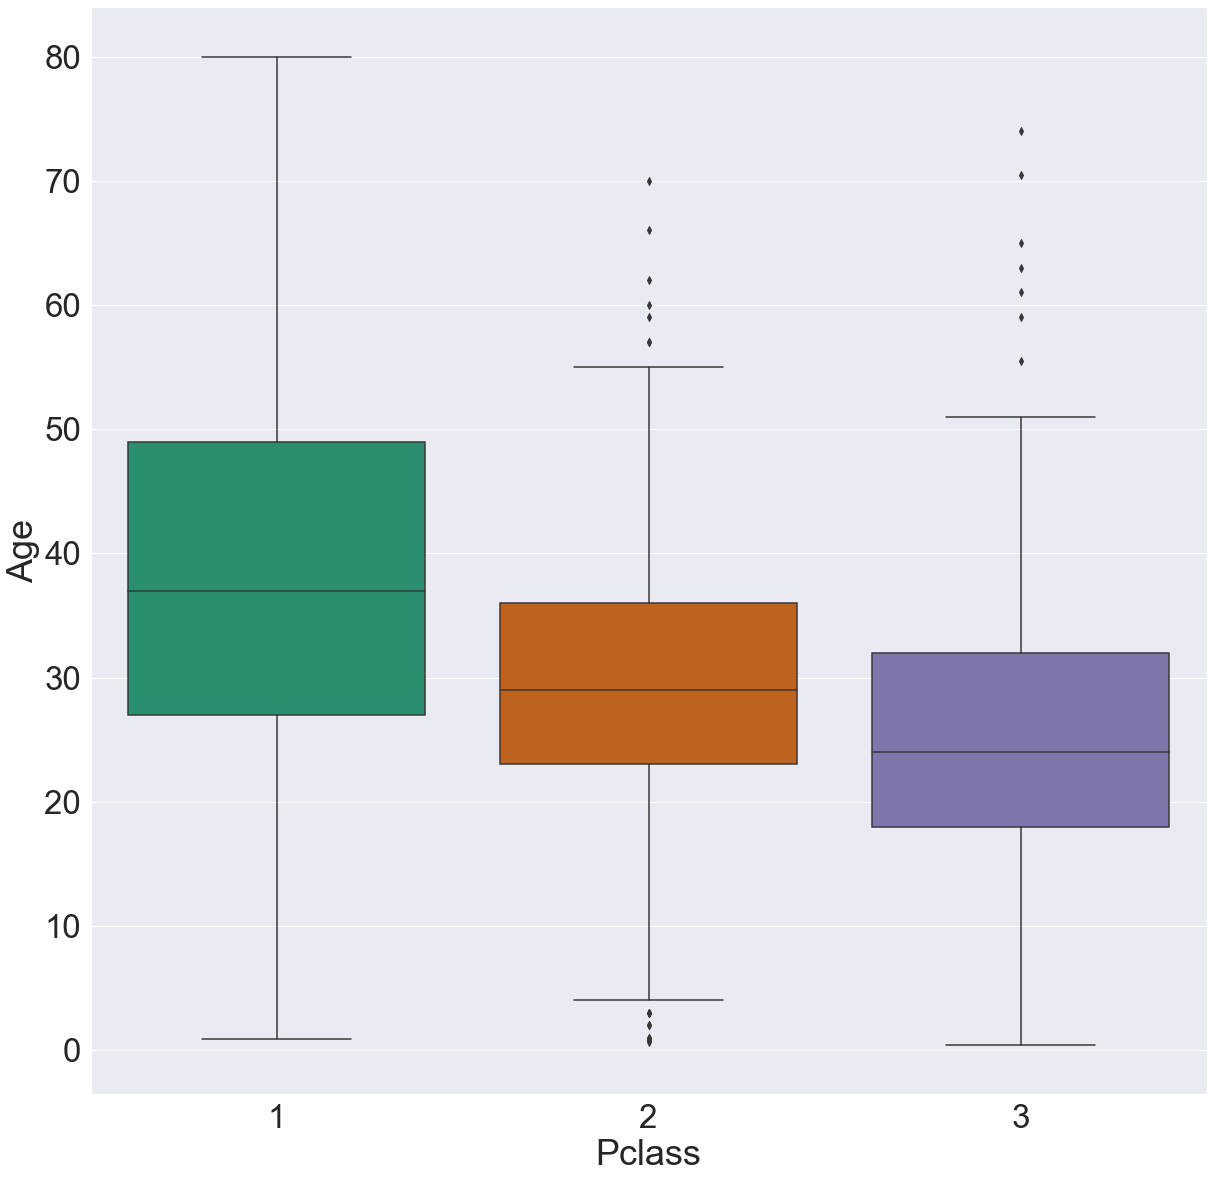

In [129]:
sns.boxplot(x='Pclass', y='Age', data=df , palette = "Dark2")

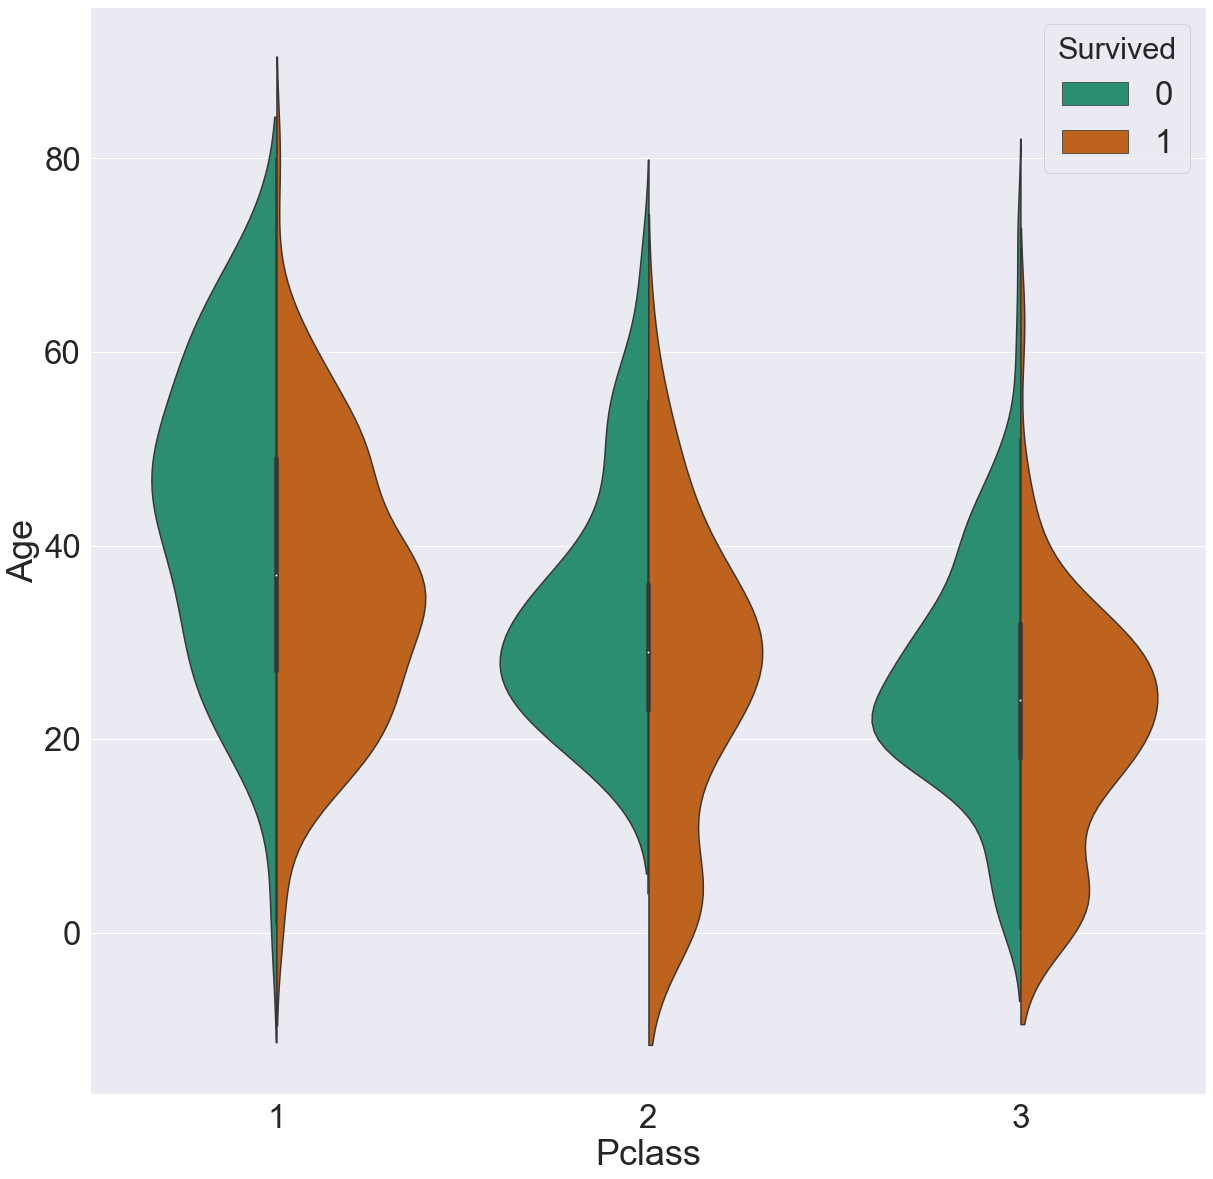

In [127]:
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', split=True , palette = "Dark2")

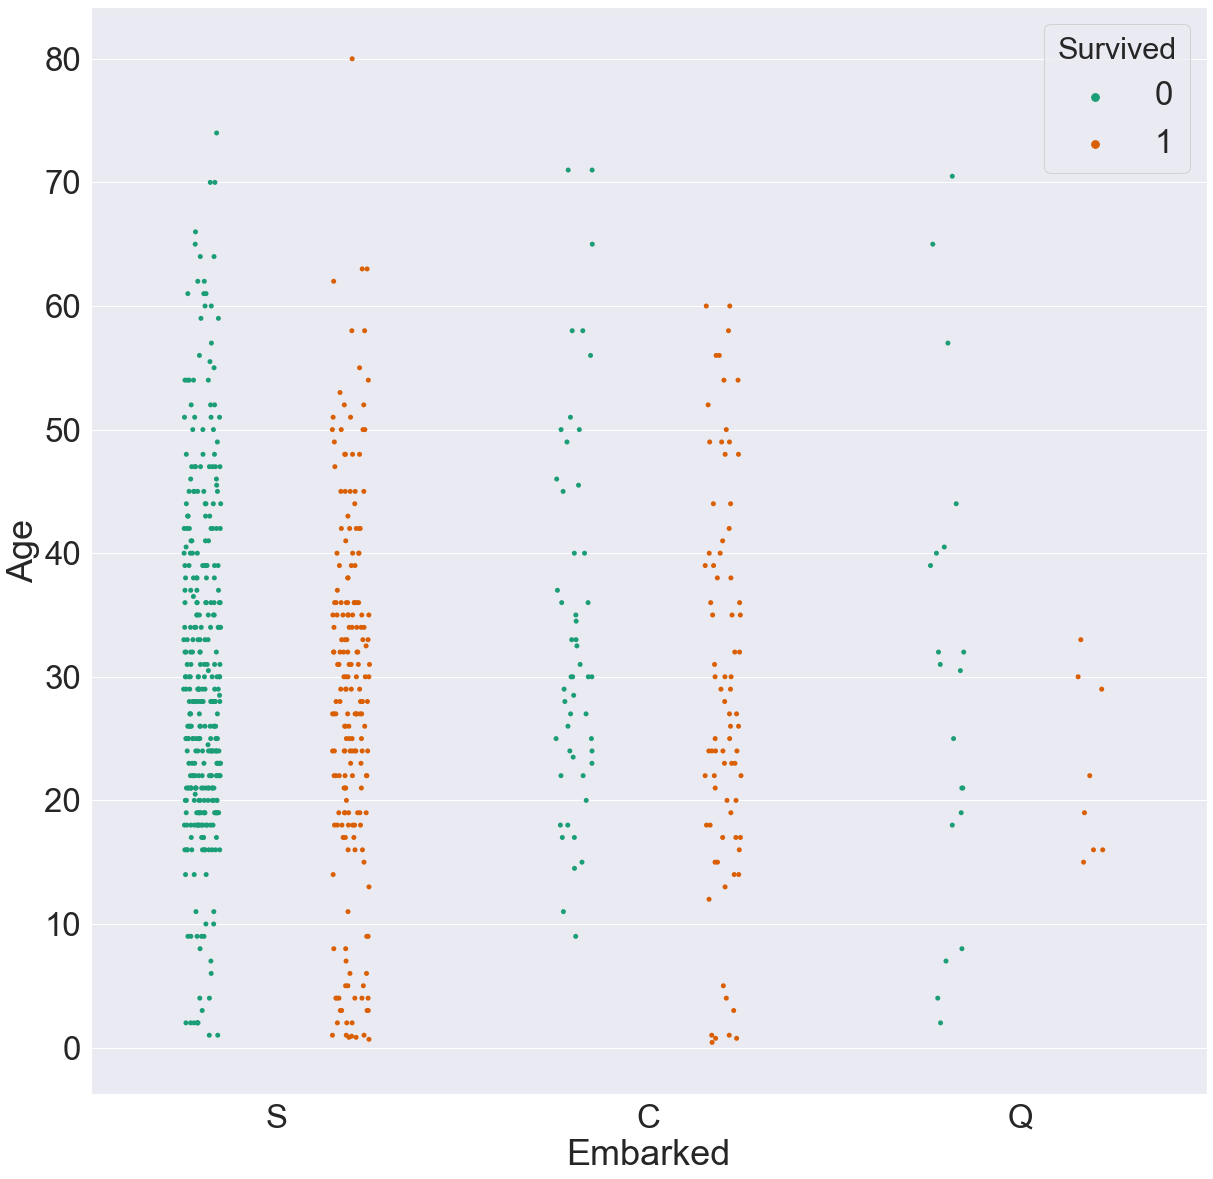

In [123]:
sns.stripplot(x='Embarked', y='Age', data=df, hue='Survived', dodge=True , palette = "Dark2")

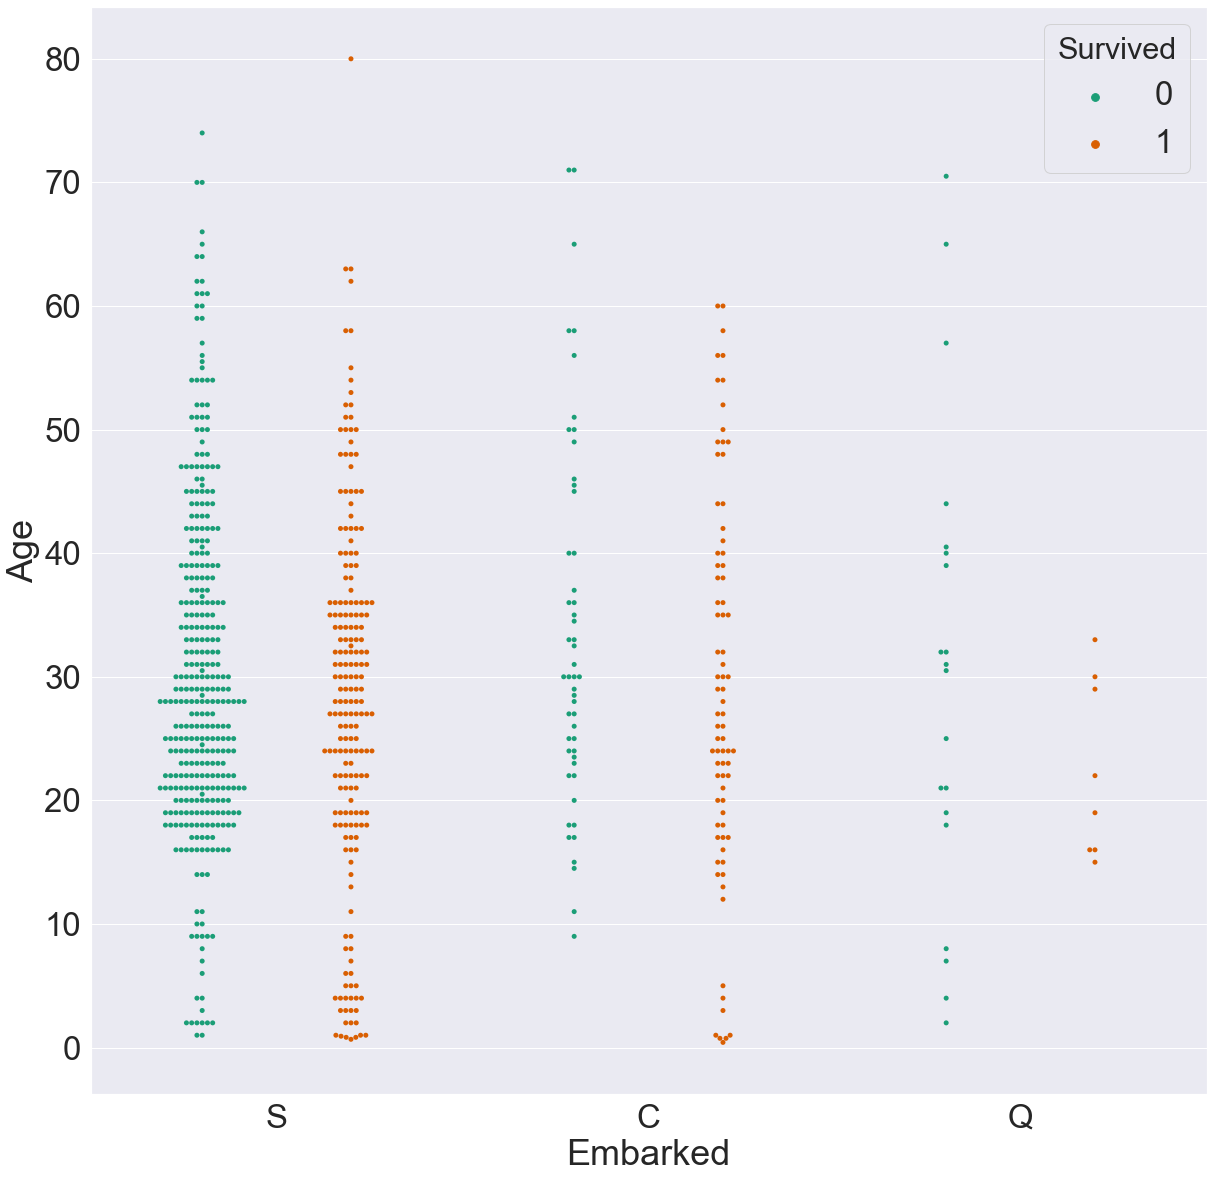

In [124]:
sns.swarmplot(x='Embarked', y='Age', data=df, hue='Survived', dodge=True , palette = "Dark2")

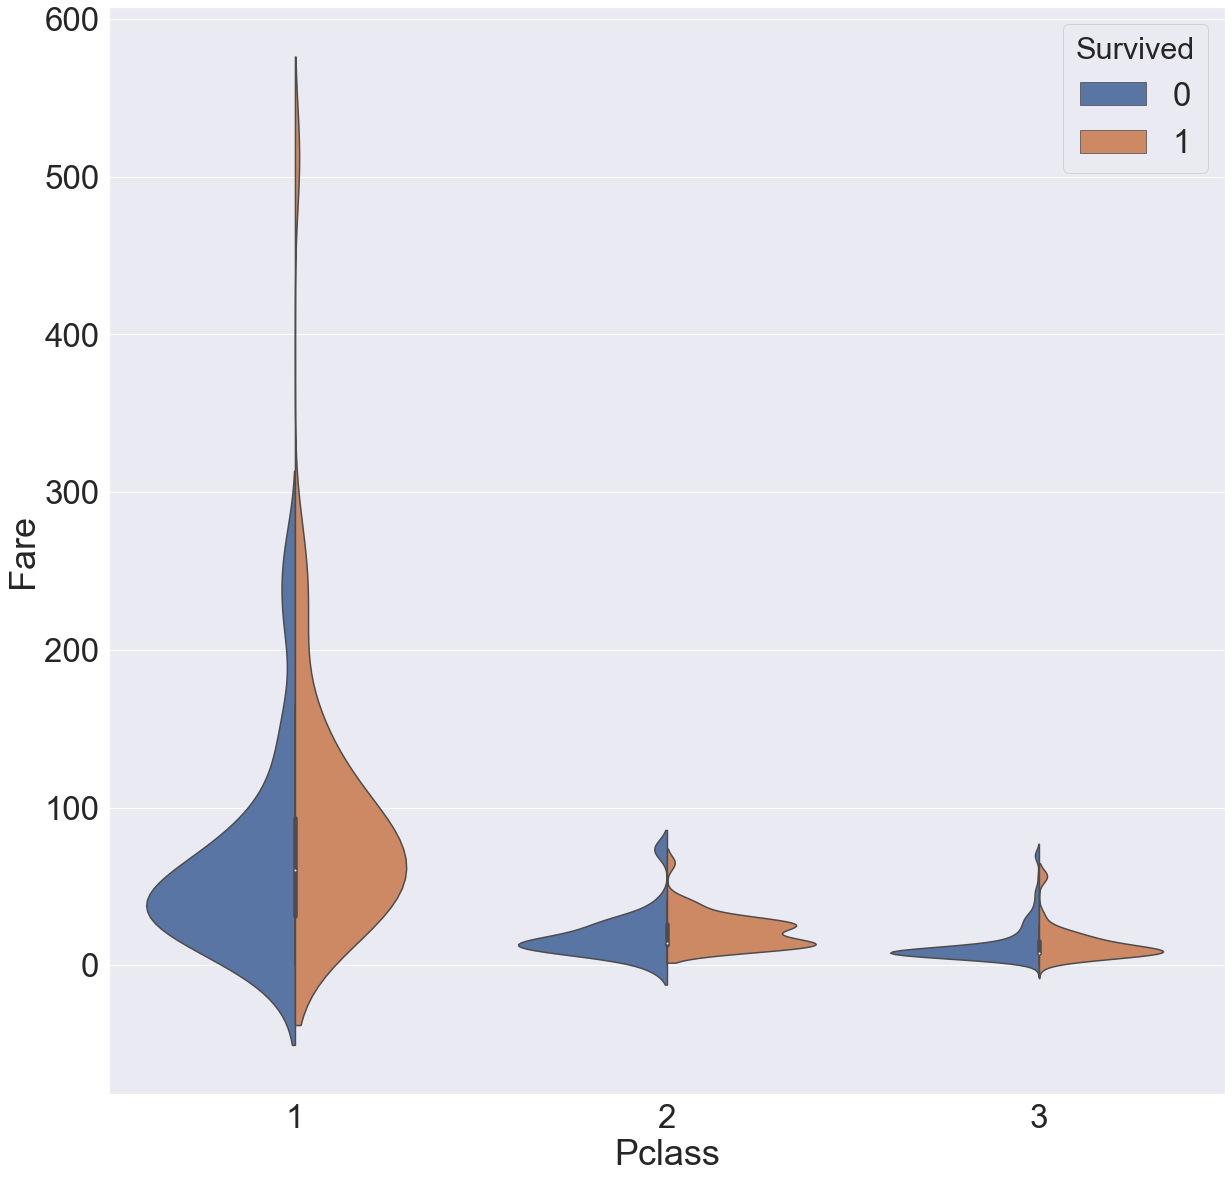

In [142]:
sns.violinplot(x='Pclass', y='Fare', data=df, hue='Survived', split=True)

In [28]:
import numpy as np

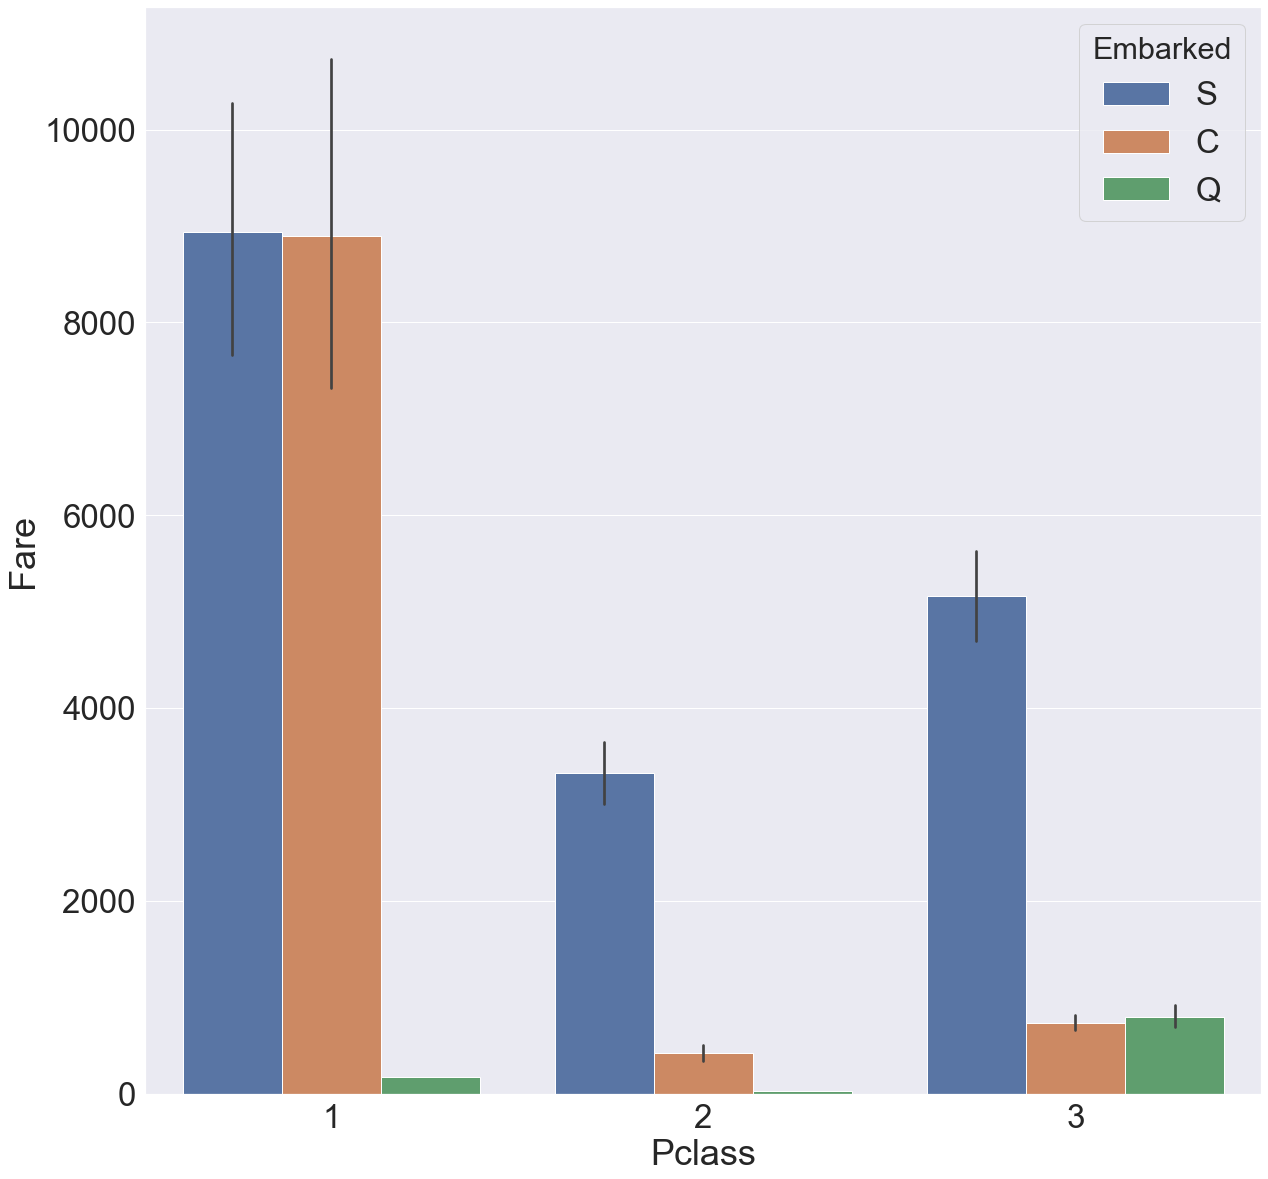

In [119]:
sns.barplot(x='Pclass', y='Fare', data=df, estimator=np.sum, hue='Embarked')

In [30]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [116]:
df_corr = df.corr()
df_corr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

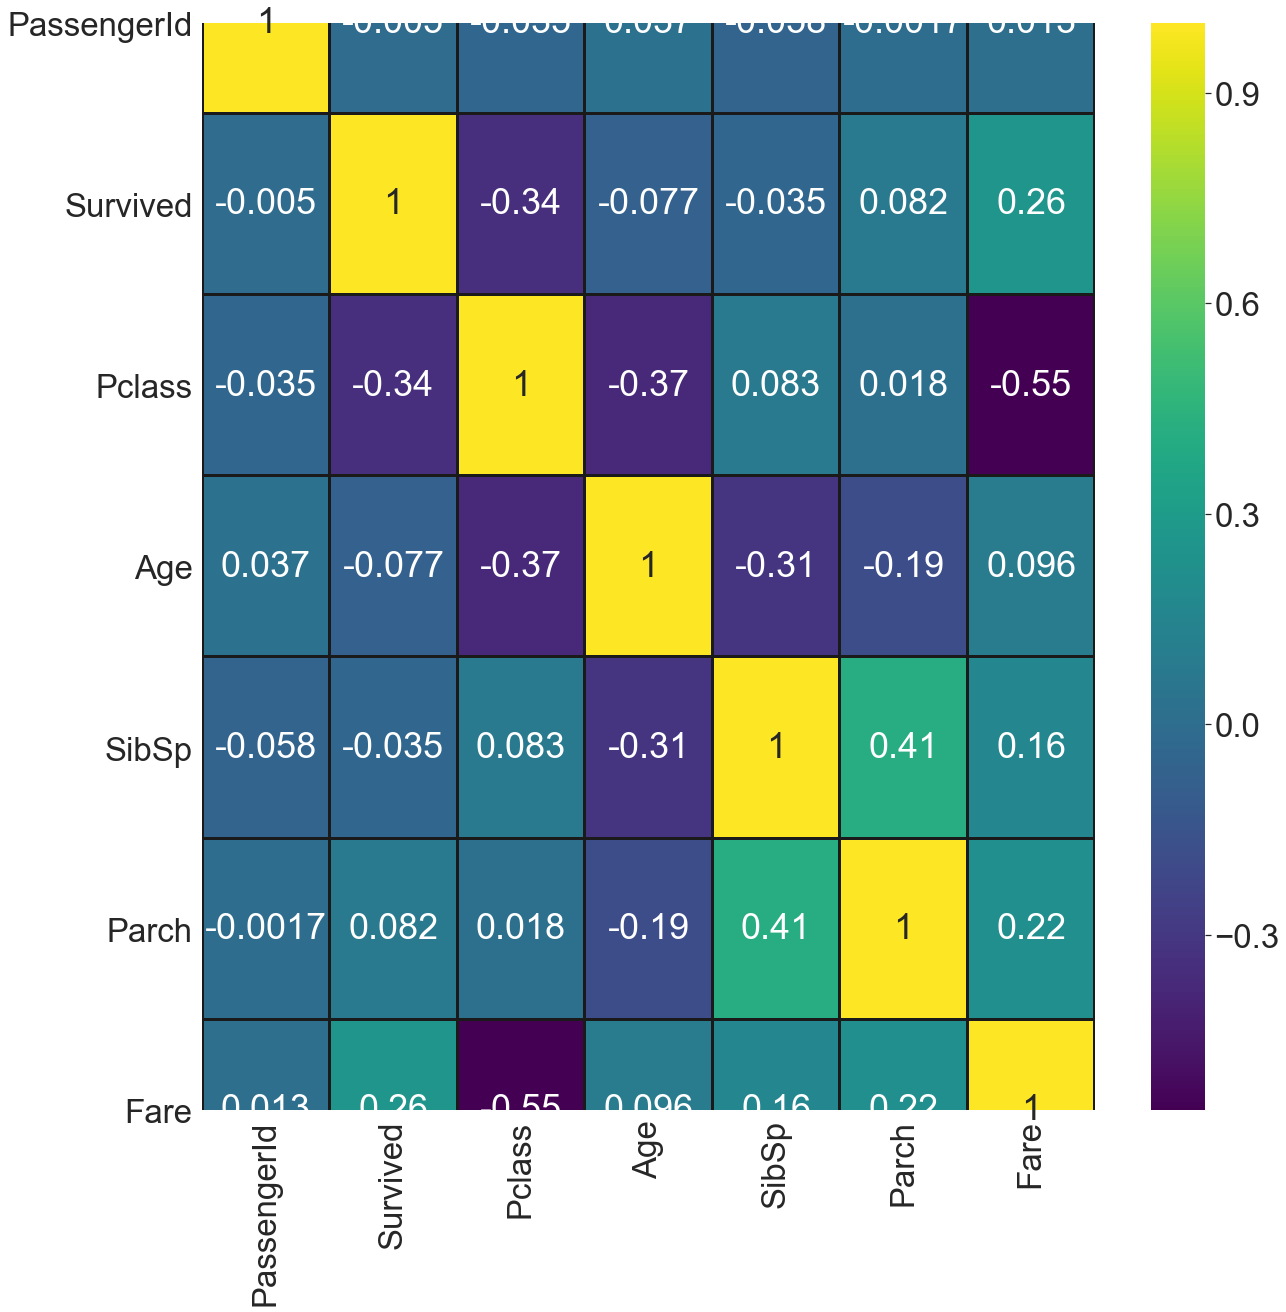

In [117]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

* Feature_Engineering Process ::
    * It is one of the most important phase in data scientist life cycle which we generate new_fearturs from the old features that not enough for training models

In [164]:
# Since all the siblings/spouses and parents/children constutute one family, we can have the total family members as a feature

df['Family_members'] = df['SibSp'] + df['Parch'] 

In [166]:
df[['Family_members']]

Family_members
0                 1
1                 1
2                 0
3                 1
4                 0
..              ...
886               0
887               0
888               3
889               0
890               0

[891 rows x 1 columns]

In [172]:
df[["Name"]]

Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
..                                                 ...
886                              Montvila, Rev. Juozas
887                       Graham, Miss. Margaret Edith
888           Johnston, Miss. Catherine Helen "Carrie"
889                              Behr, Mr. Karl Howell
890                                Dooley, Mr. Patrick

[891 rows x 1 columns]

In [168]:
# get Title of The Titanic Members ::
df['Title'] = df.Name.map(lambda x : (x.split(',')[1].split('.')[0].strip()))
df[['Title']]

Title
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
..    ...
886   Rev
887  Miss
888  Miss
889    Mr
890    Mr

[891 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

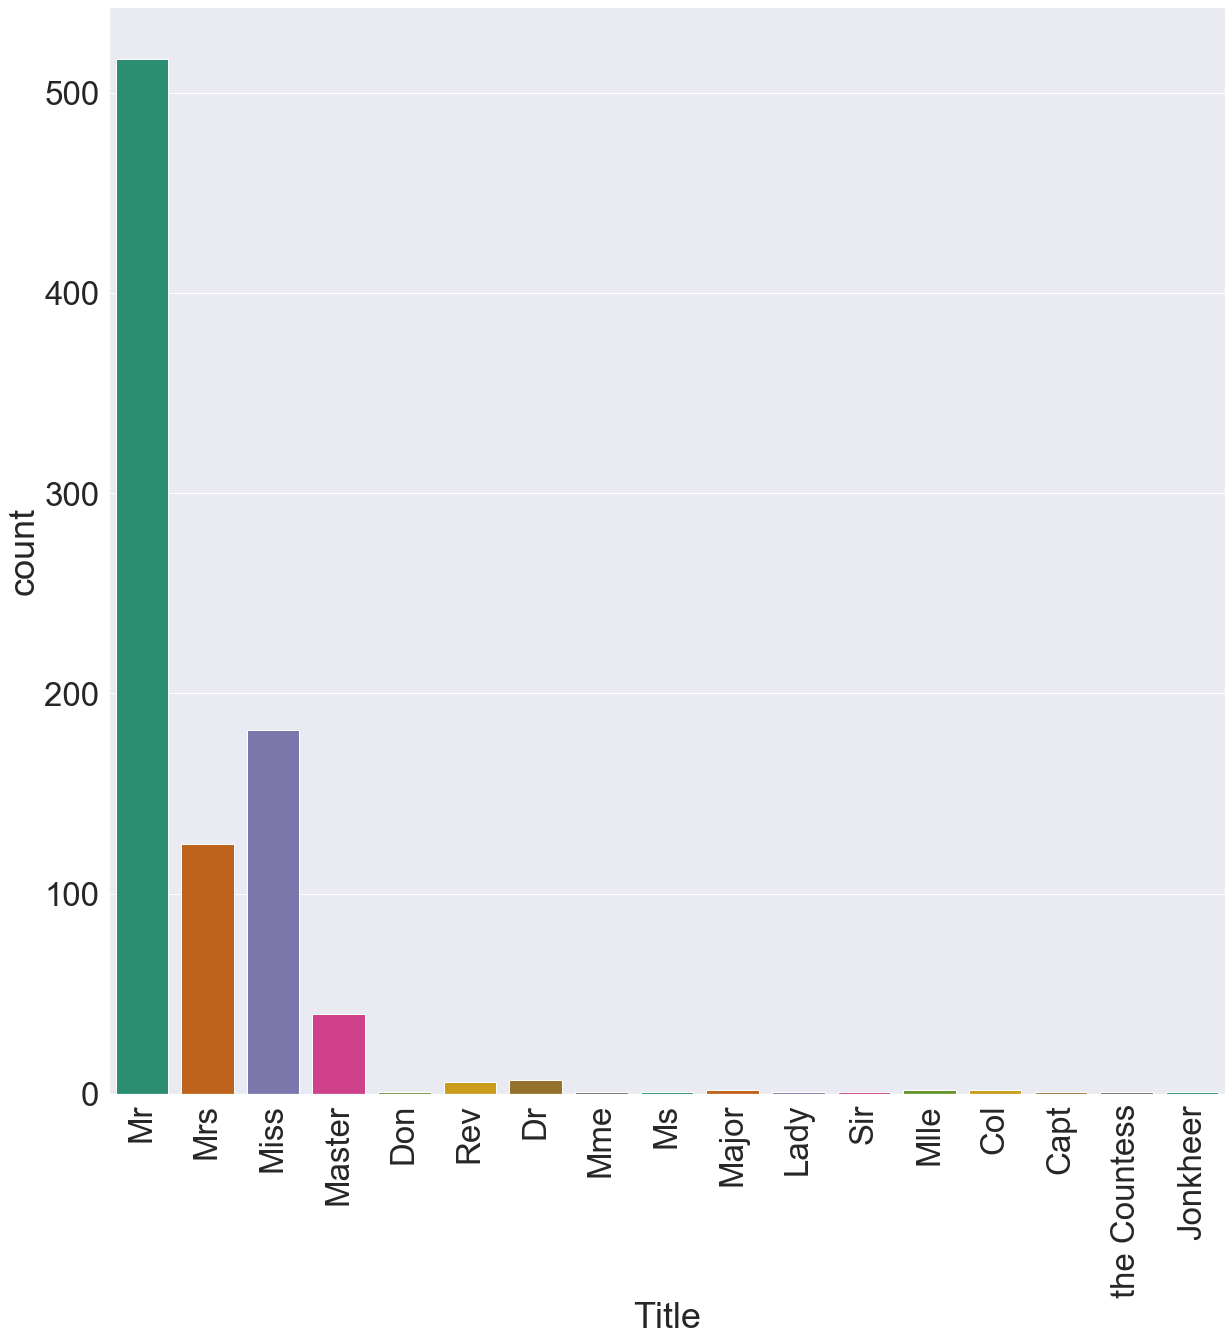

In [171]:
sns.countplot("Title" ,data = df , palette = "Dark2")
plt.xticks(rotation = 90)

* Let's define those obscure titles or titles native to some country that may not be known to common public
   * Rev - (as the title of a priest) Reverend
   * Col - Colonel
   * Mlle - Mademoiselle (in French)
   * Dona - a woman or girlfriend (in Italian)
   * Jonkheer - Honorific of nobility is literally translated as "young lord" or "young lady" in Low Countries
   * Mme - Madame (is a traditional alternative for an unmarried woman in France)
   * Don - Don, abbreviated as D., is an honorific prefix primarily used in Spain and the former Spanish Empire, Croatia, Italy, and Portugal and its former colonies.¶

* Let's check if these titles belong to male or female category in order to classify them properly
* titanic.loc[titanic.Title == 'Rev'] --> All male so adding to Mr 
* titanic.loc[titanic.Title == 'Col'] --> All male so adding to Mr
* titanic.loc[titanic.Title == 'Mlle'] --> Adding to Miss
* titanic.loc[titanic.Title == 'Dona'] --> Adding to Mrs
* titanic.loc[titanic.Title == 'Jonkheer'] --> Adding to Mr
* titanic.loc[titanic.Title == 'Mme'] --> Adding to Miss
* titanic.loc[titanic.Title == 'Don'] --> Adding to Mr
* titanic.loc[titanic.Title == 'the Countess'] --> Adding to Mrs
* titanic.loc[titanic.Title == 'Lady'] --> Adding to Mrs

In [175]:
# We can combine rare occurings of titles under one title also beacuse it may interfere with our model if one observation occurs in test data and not in train
# data which will lead to hampered accuracy.

df["Title"] = df["Title"].replace(['Sir','Capt','Don','Col','Jonkheer','Rev','Major'], 'Mr')

df["Title"] = df["Title"].replace(['Dona','the Countess','Lady'], 'Mrs')

df["Title"] = df["Title"].replace(['Ms','Mlle','Mme'], 'Miss')

Titels = df["Title"].value_counts()
Titels

Mr        531
Miss      186
Mrs       127
Master     40
Dr          7
Name: Title, dtype: int64

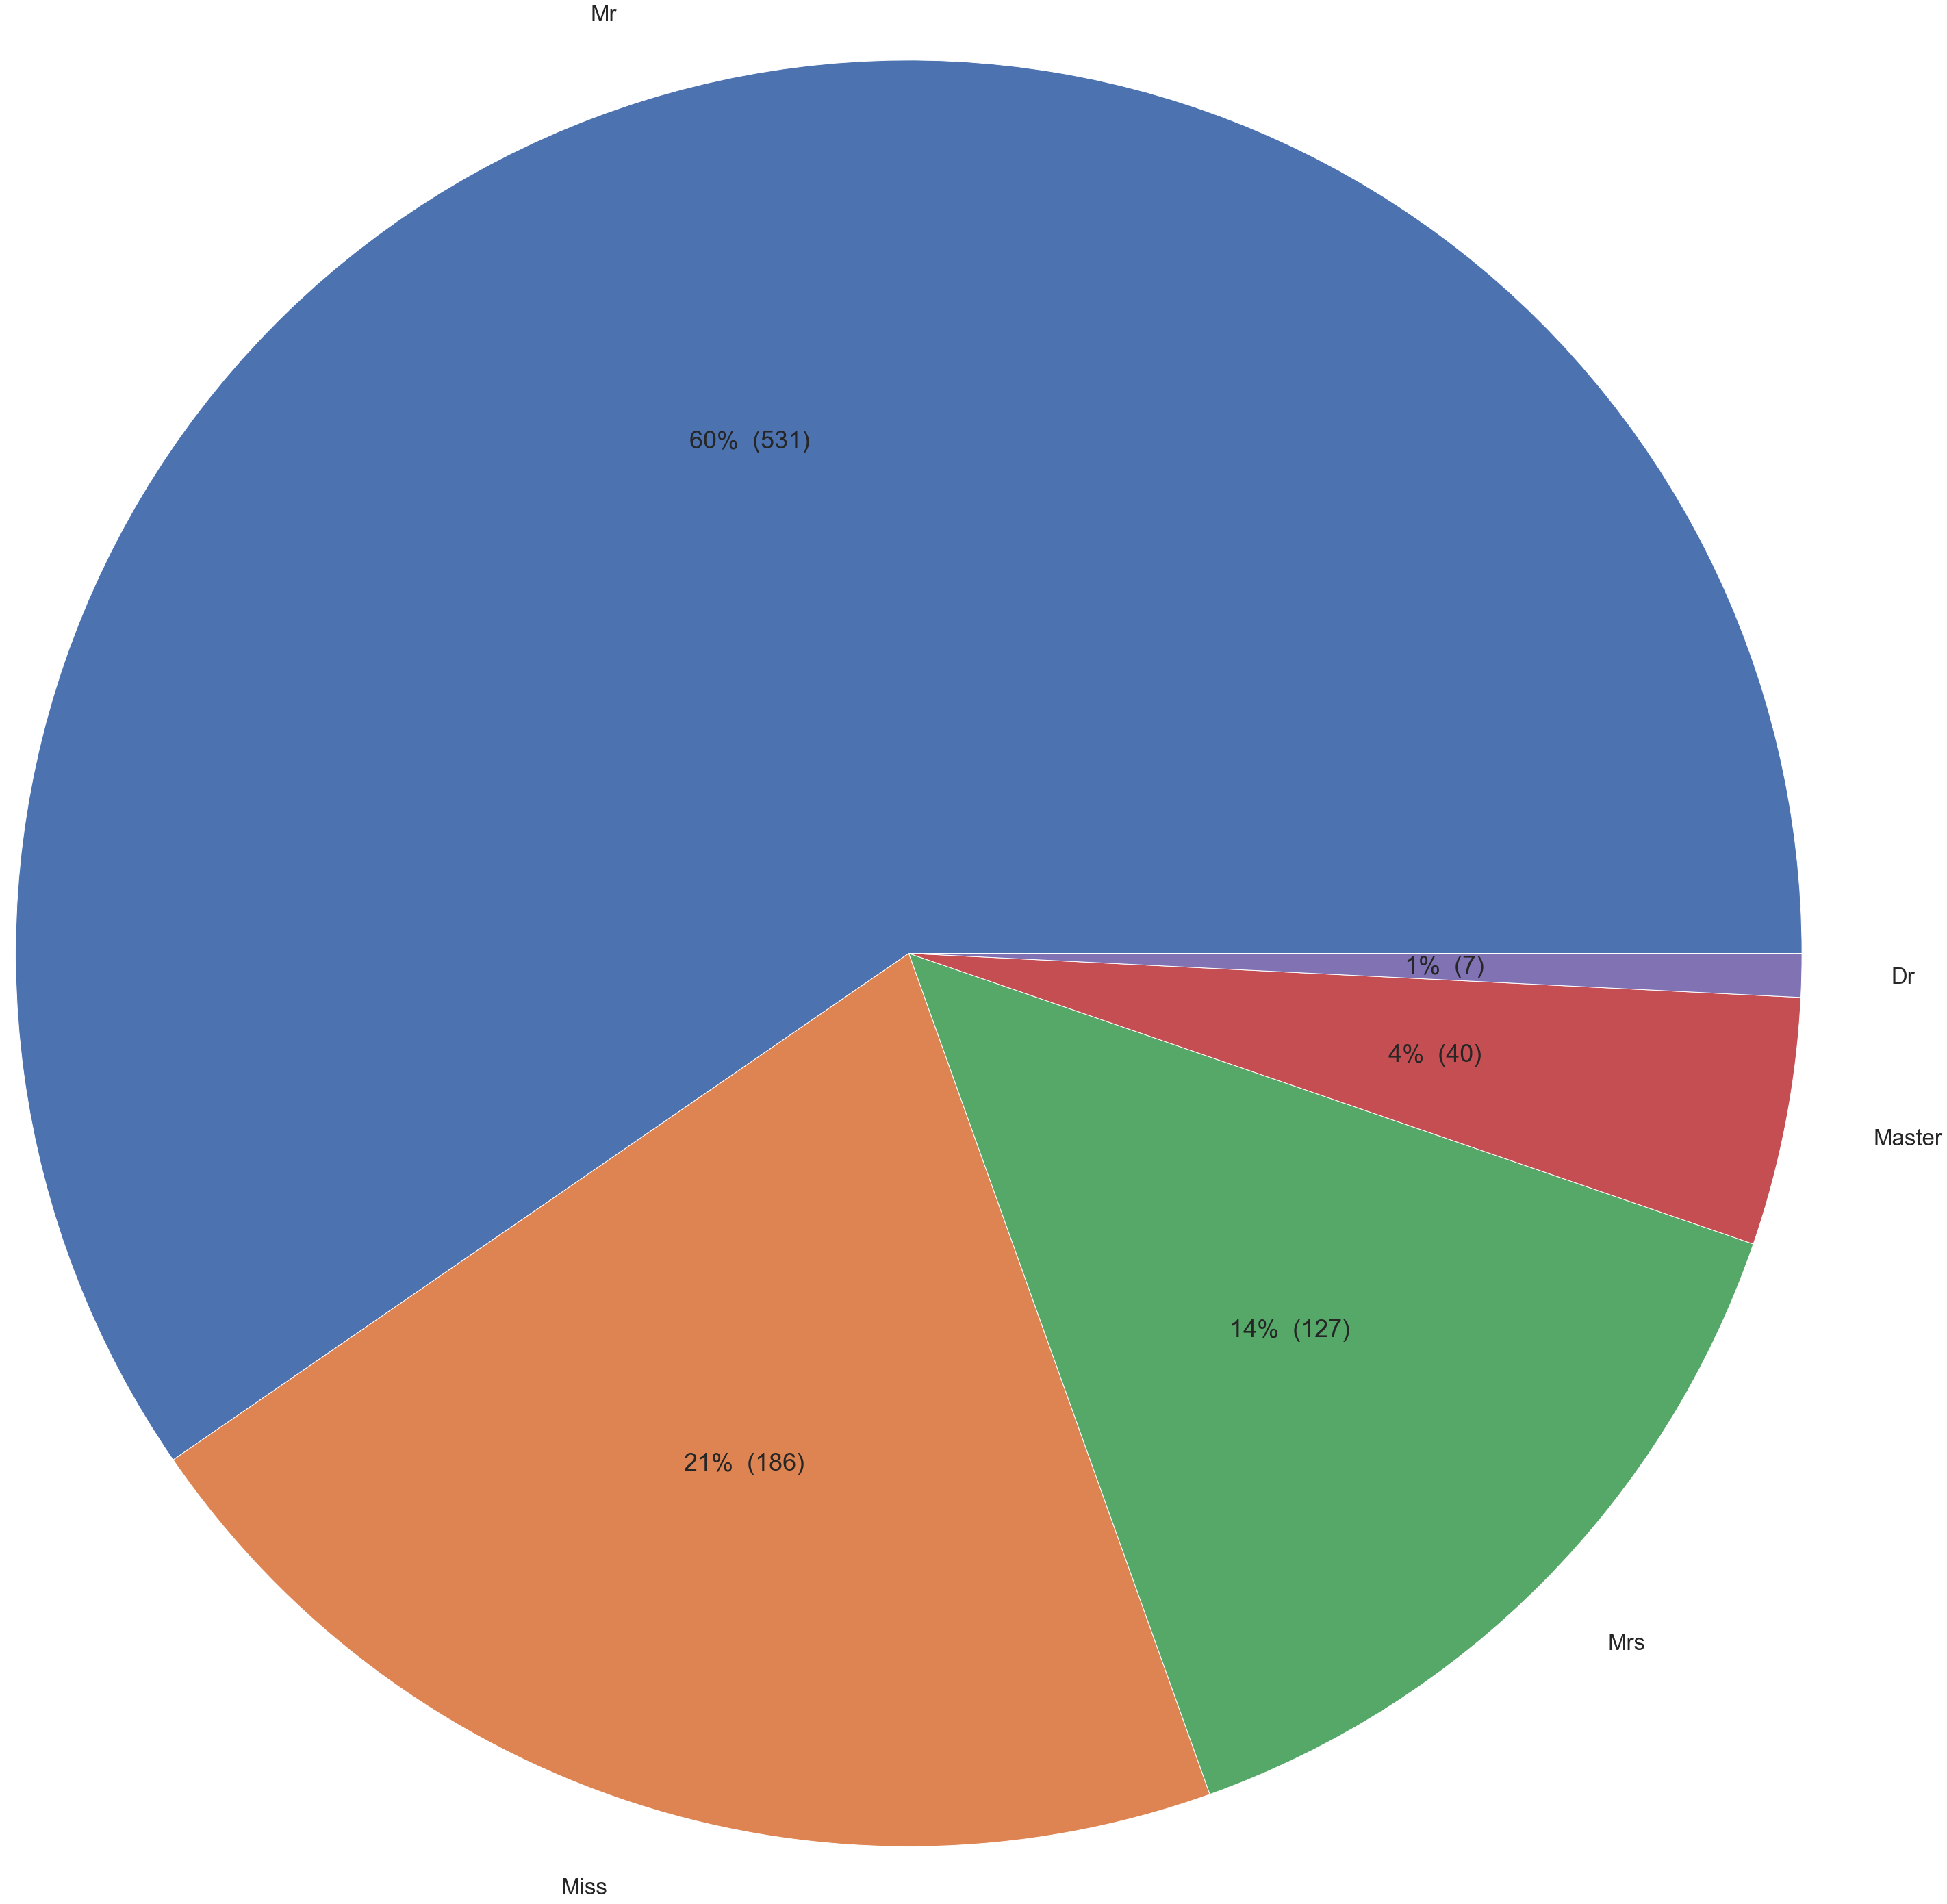

In [177]:
Titels.plot.pie(autopct=make_autopct(Titels.values) , radius = 3)

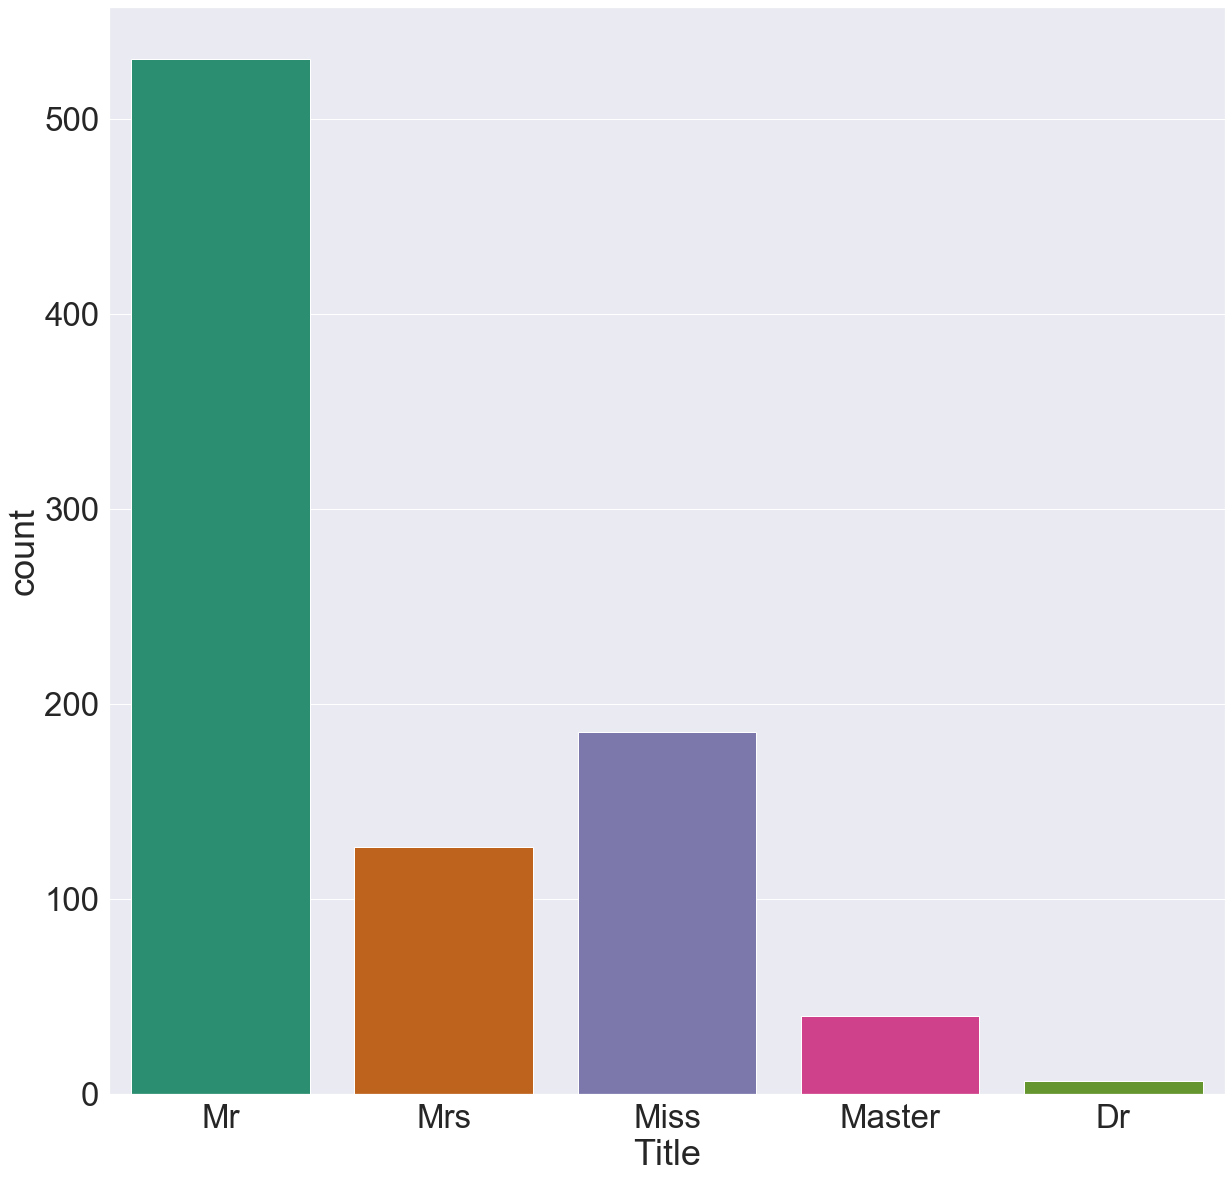

In [179]:
sns.countplot("Title" , data = df , palette = "Dark2")